In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Name and ID
​
**Name: Tamir Spilberg**
​

**Kaggle_Account: https://www.kaggle.com/tamirspil**

# TL;DR #
House Prices dataset is a collection of real estate listings in Ames, Iowa that includes various features, such as the size of the lot, number of bedrooms and bathrooms, and year built, to predict the sale price of a property. The dataset includes both numerical and categorical data, and it is up to the us to preprocess and utilize the data in order to make accurate predictions.

# Imports libraries and load Data

In [2]:
!pip install --upgrade plotly
!pip install sweetviz
!pip install -U matplotlib
import sweetviz as sw

# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import GridSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 34.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.10.0
    Uninstalling plotly-5.10.0:
      Successfully uninstalled plotly-5.10.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.9 MB/s eta 0:00:0000:0100:01


In [3]:
X = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

#Save the 'Id' column
train_ID = X['Id']
test_ID = df_test['Id']

#Target
t = X['SalePrice']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
X.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

# EDA - Essential Data Analysis

                                             |          | [  0%]   00:00 -> (? left)


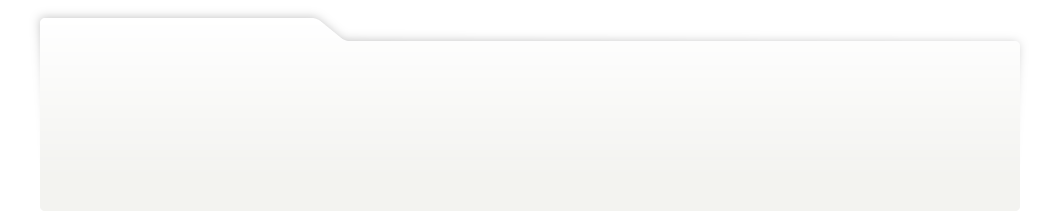
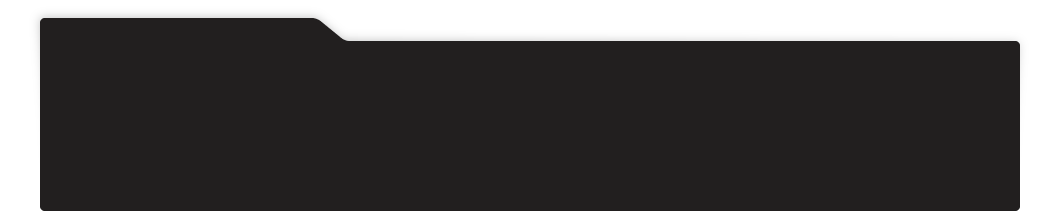
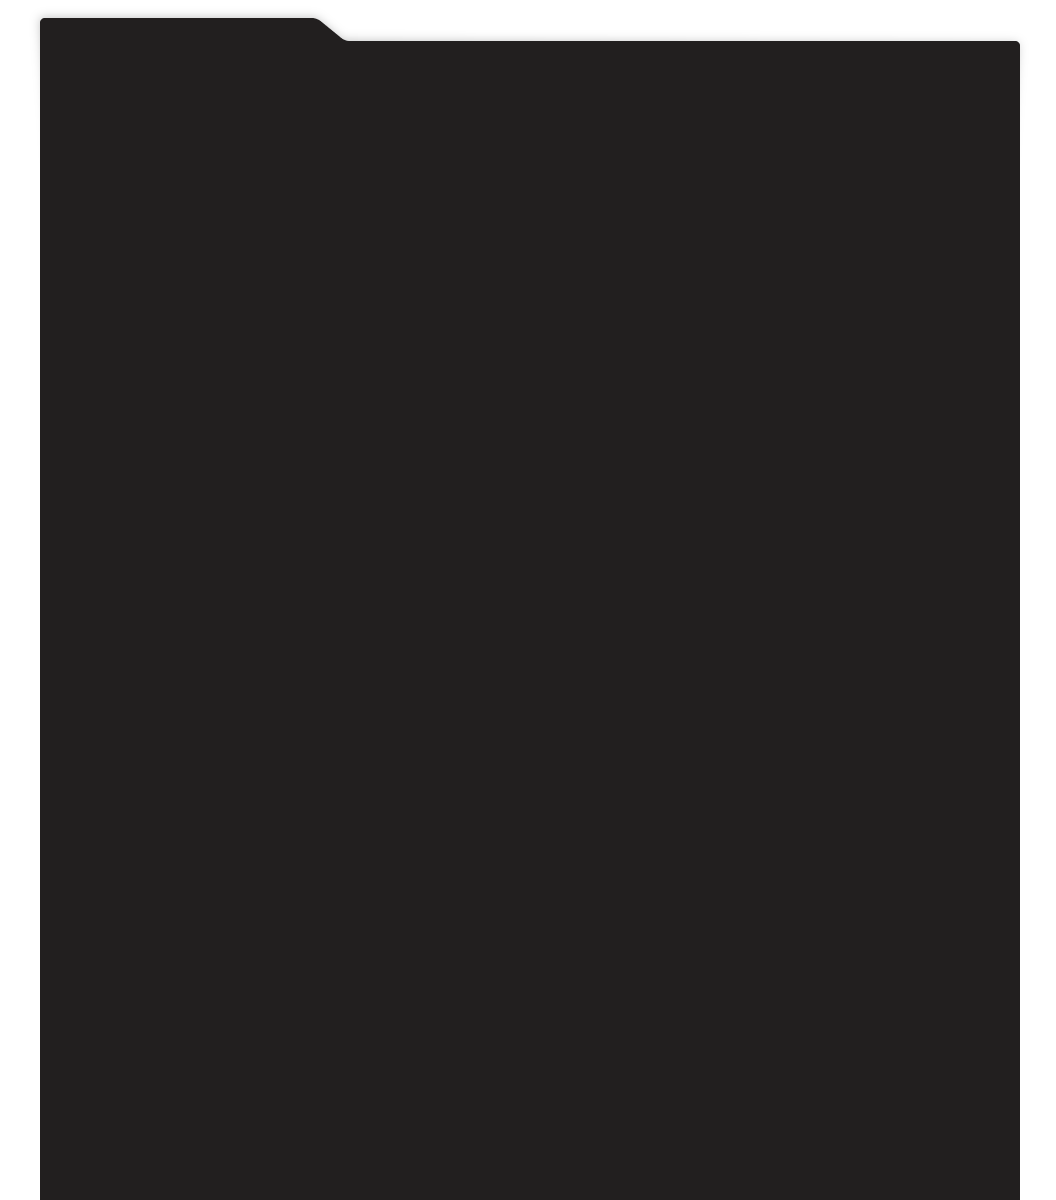
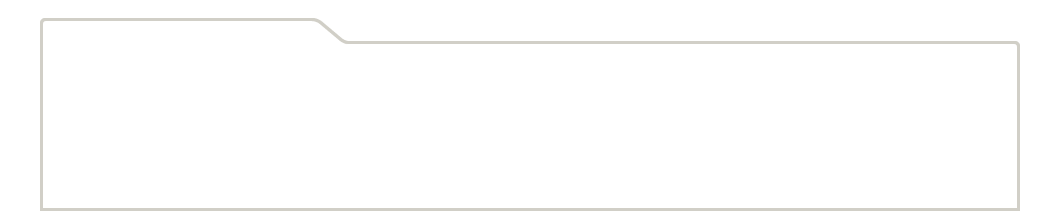
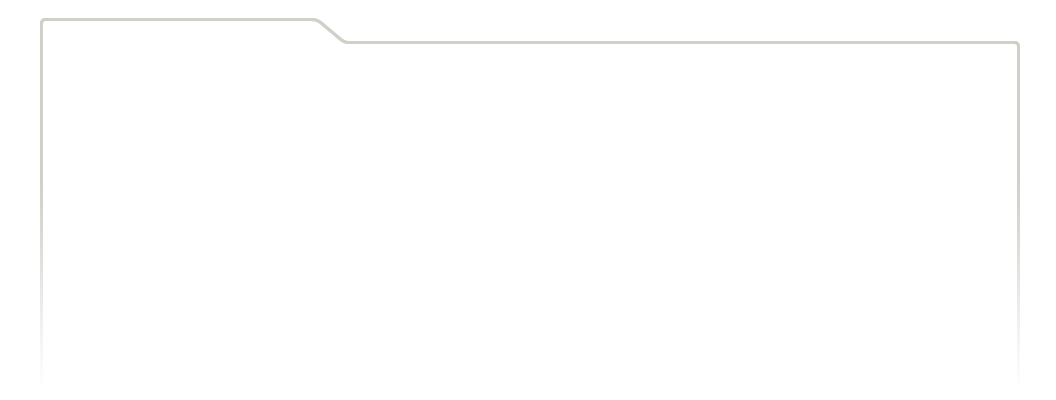
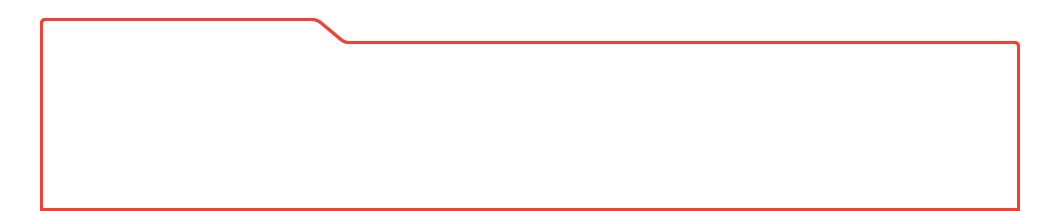
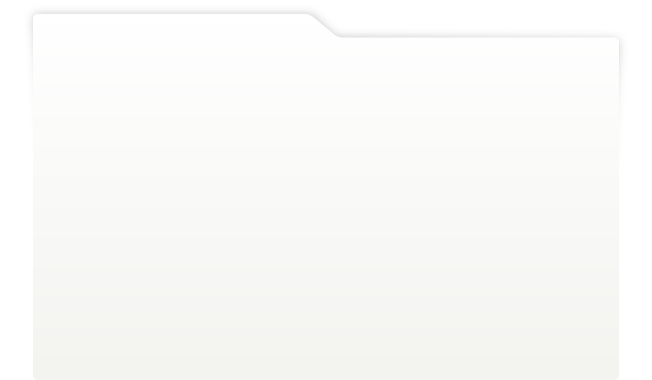
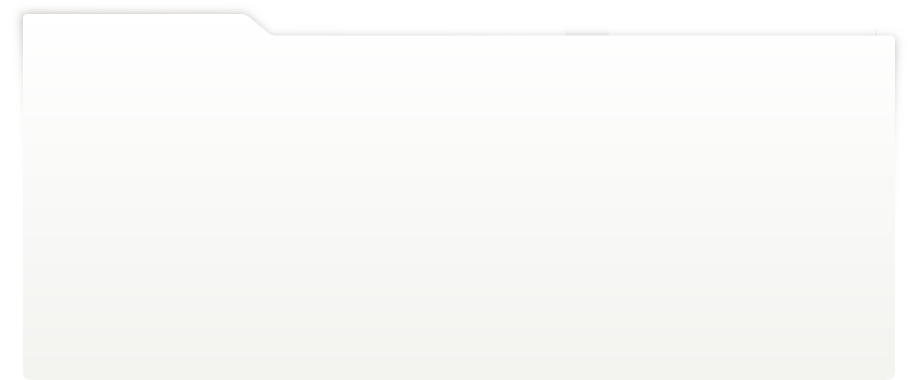
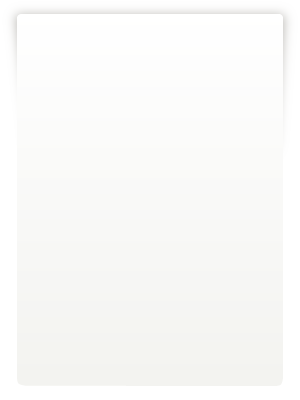
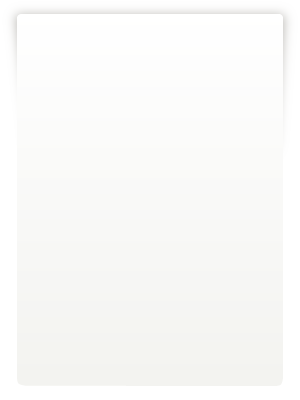
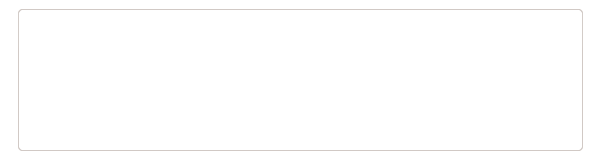
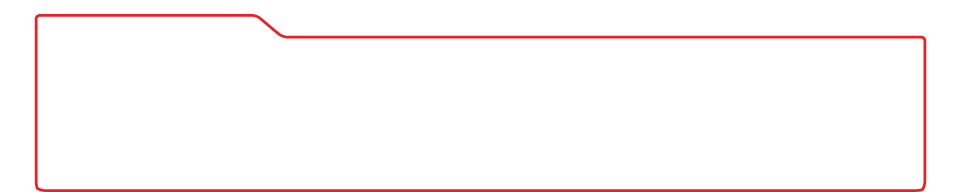
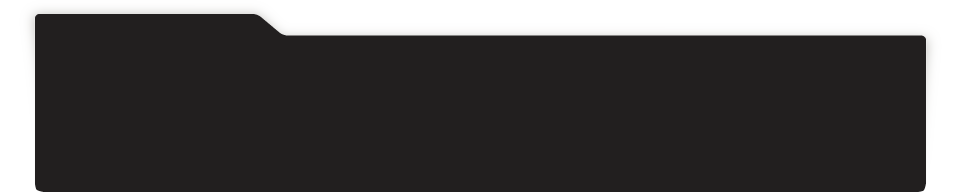
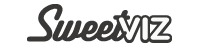
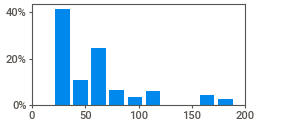
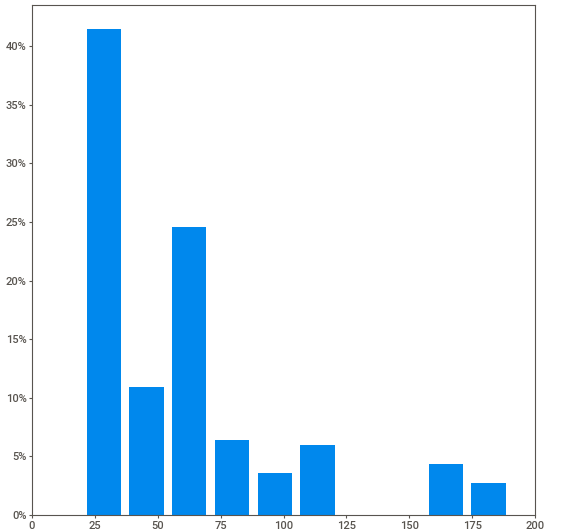
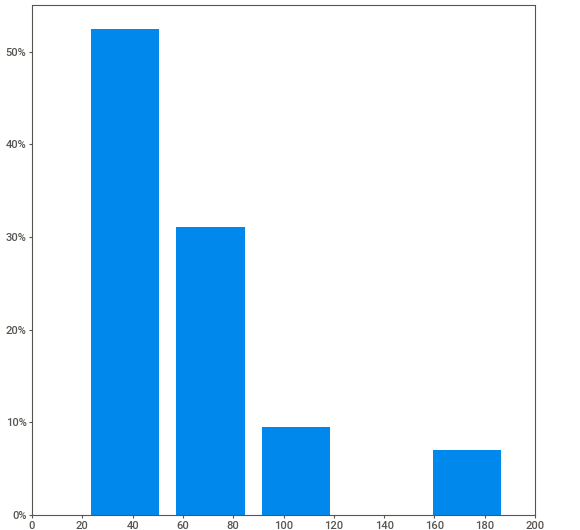
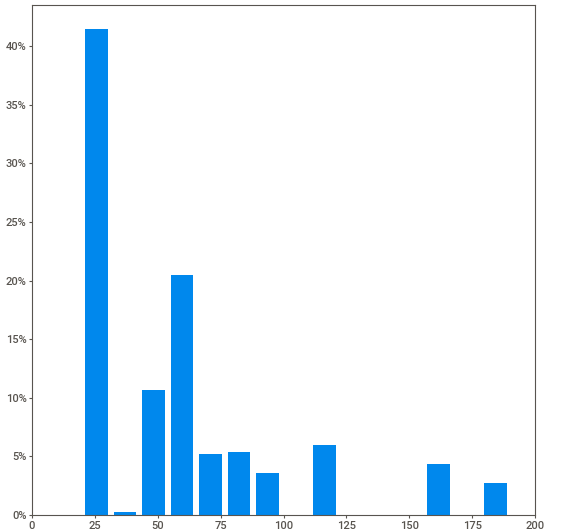
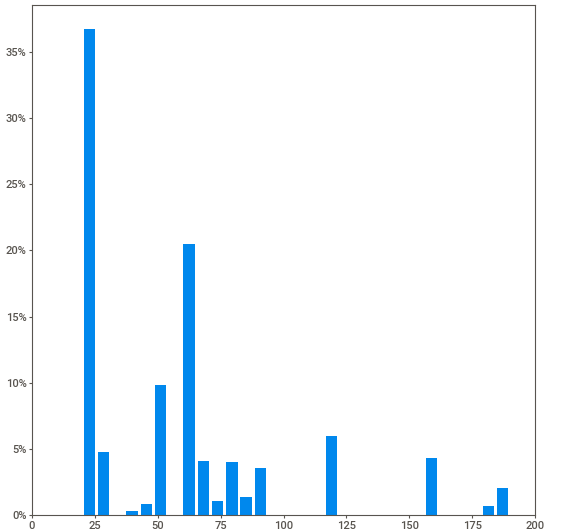
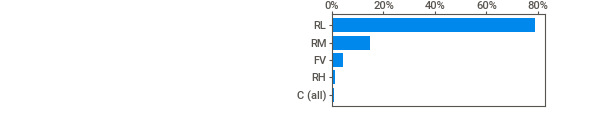
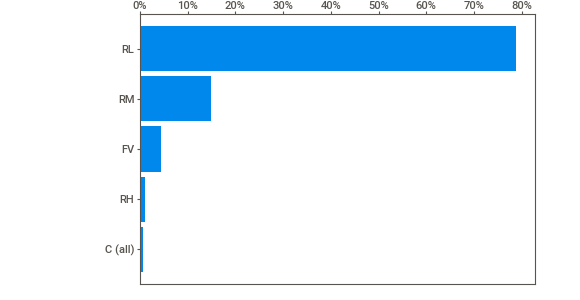
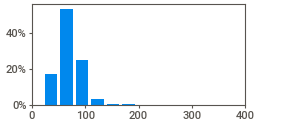
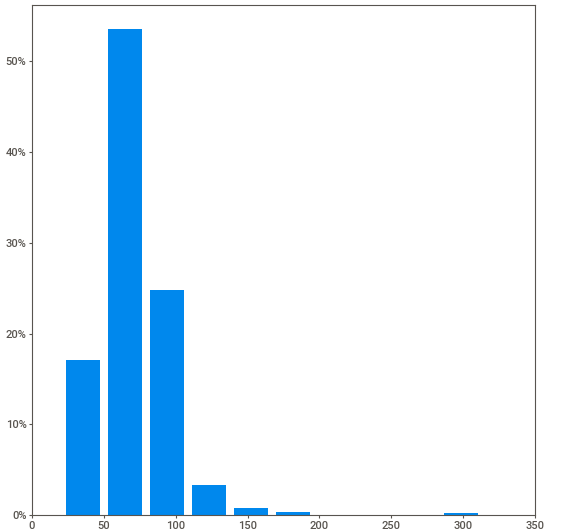
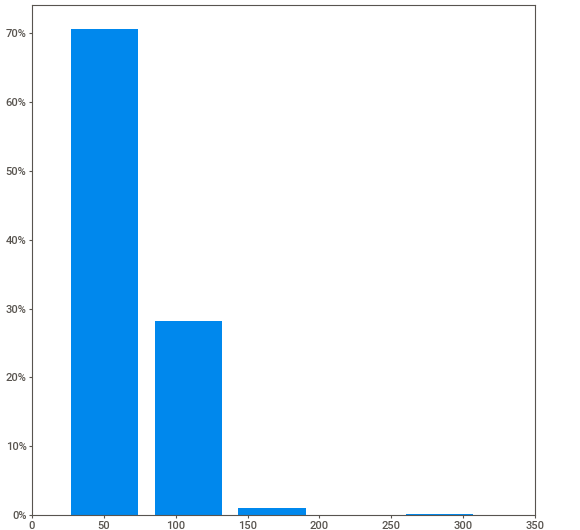
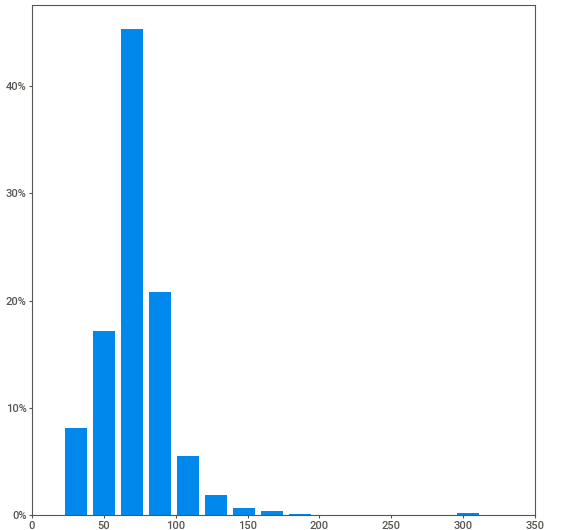
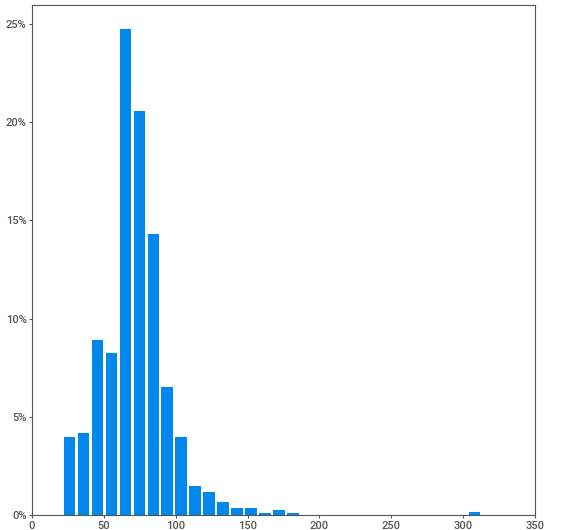
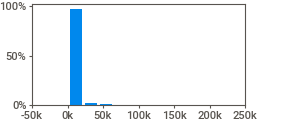
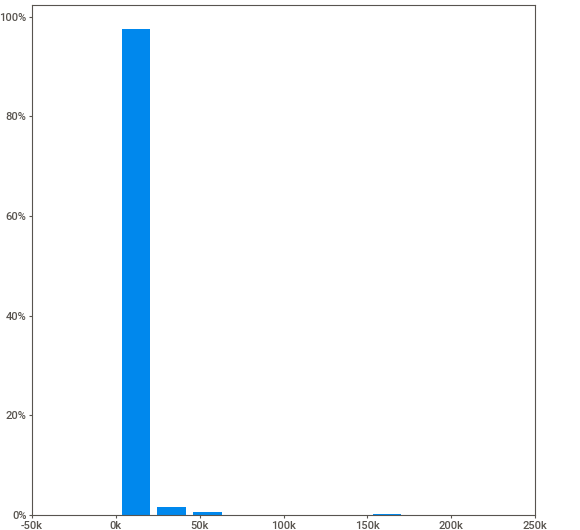
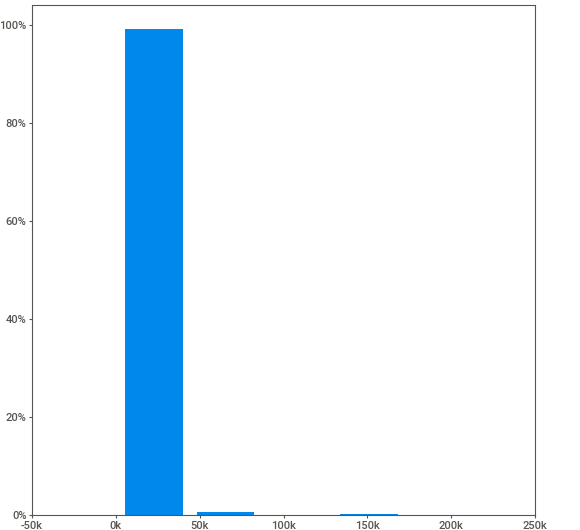
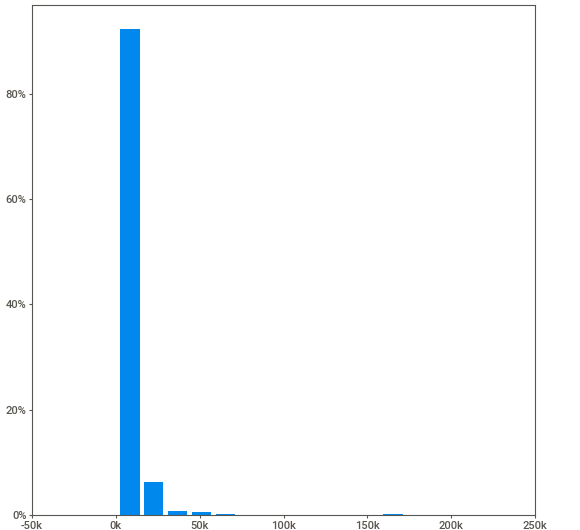
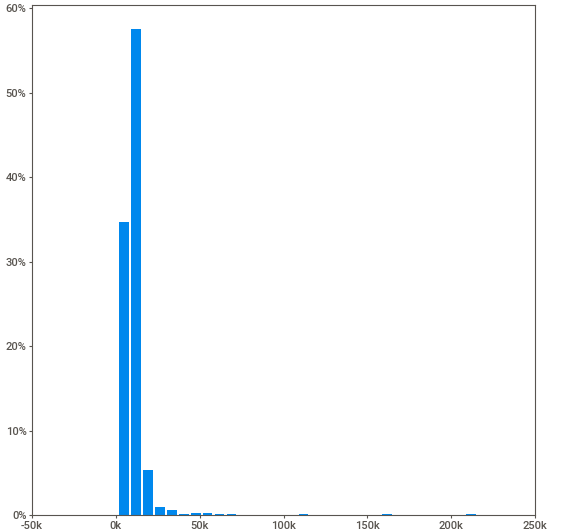
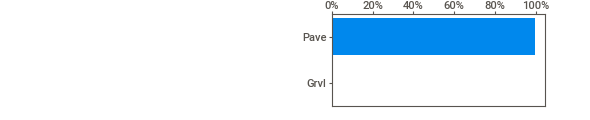
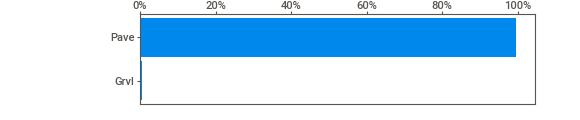
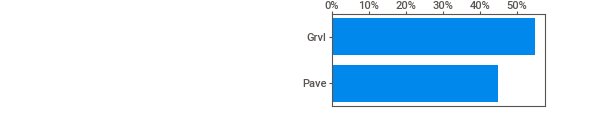
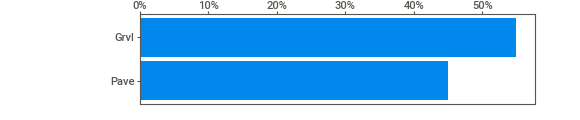
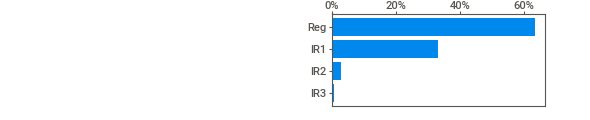
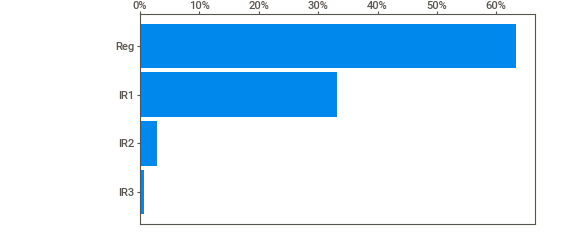
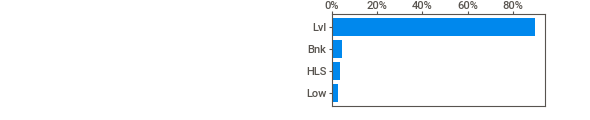
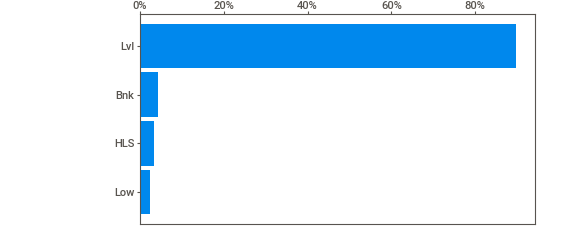
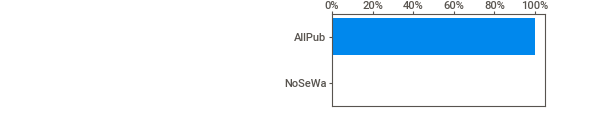
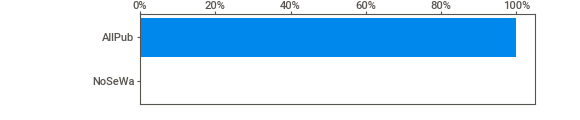
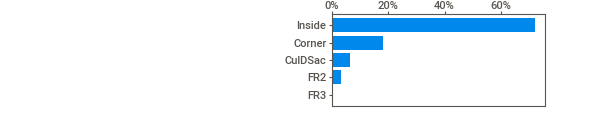
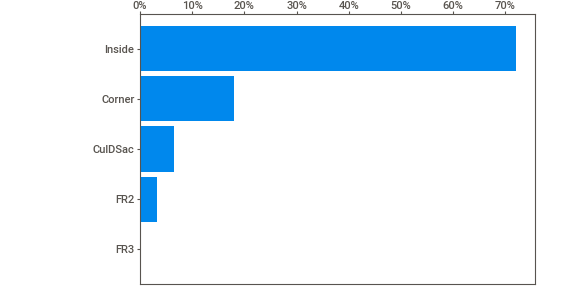
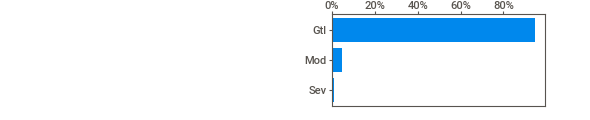
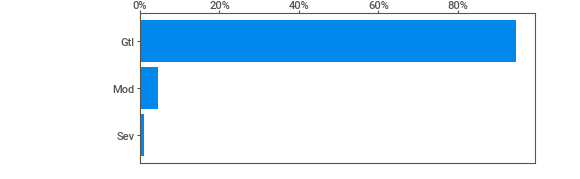
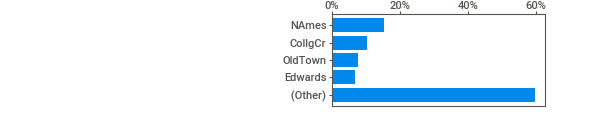
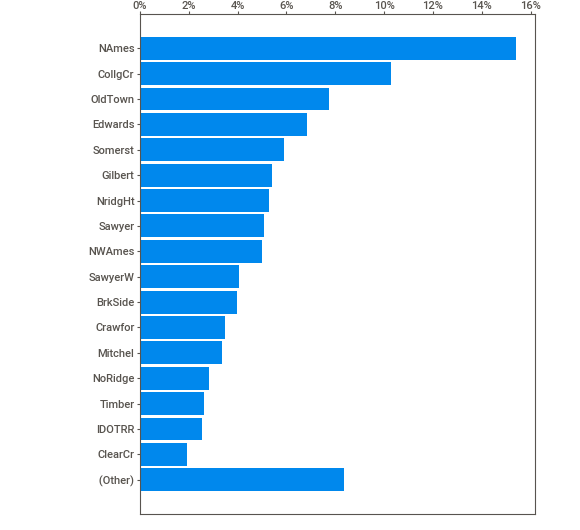
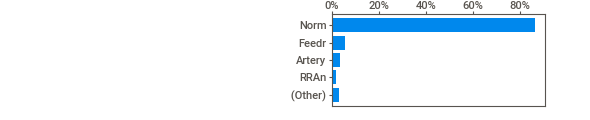
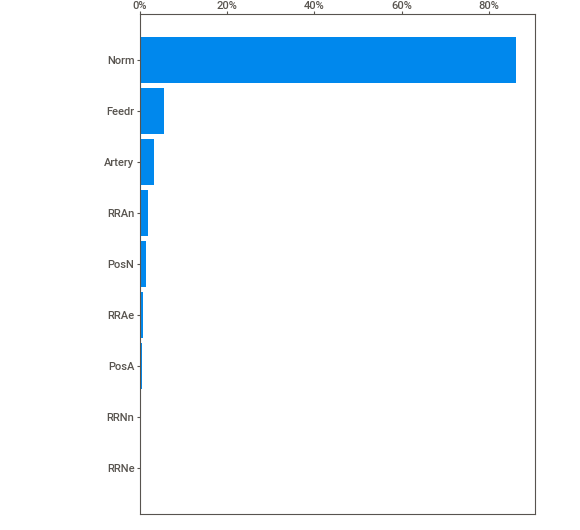
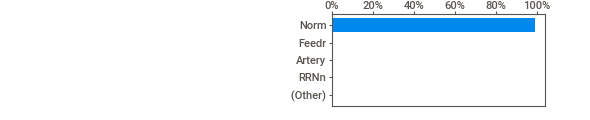
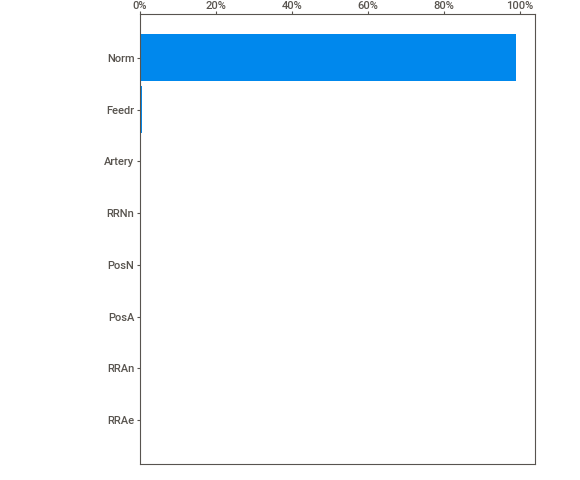
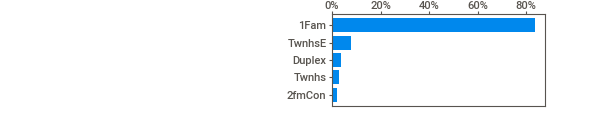
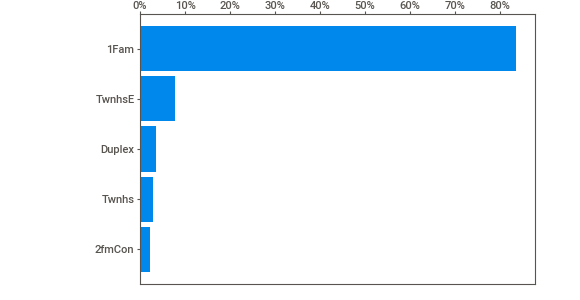
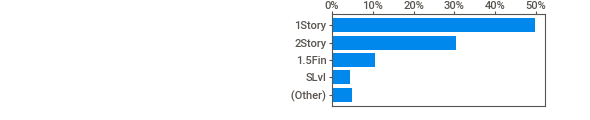
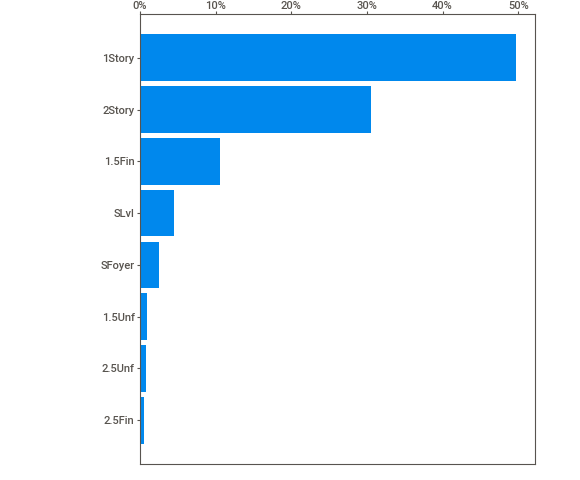
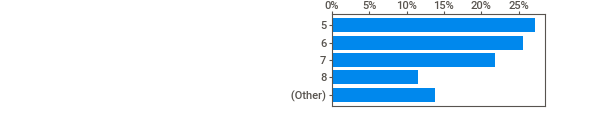
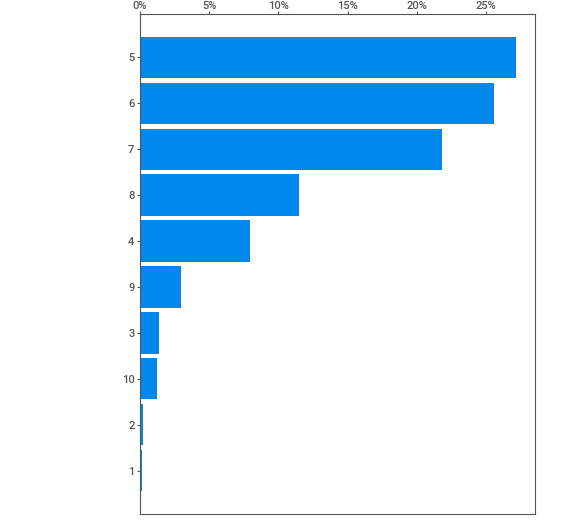
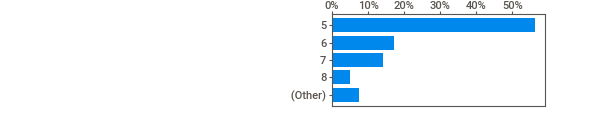
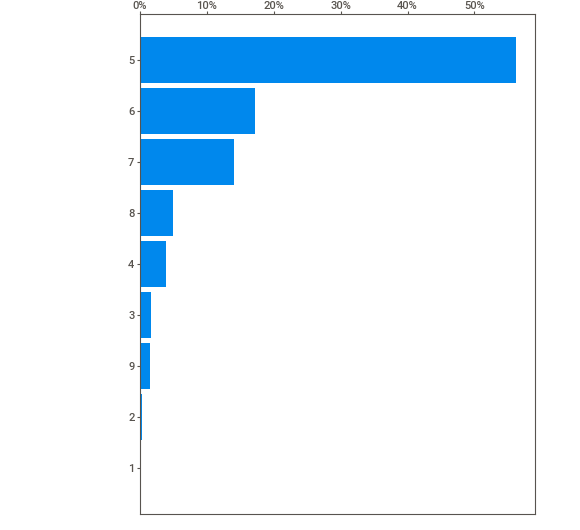
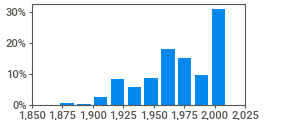
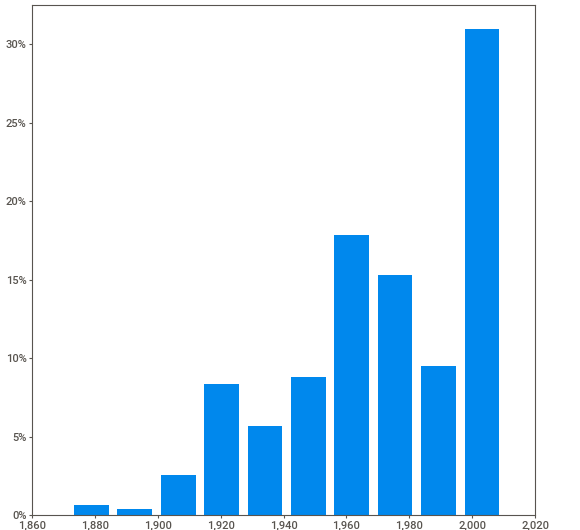
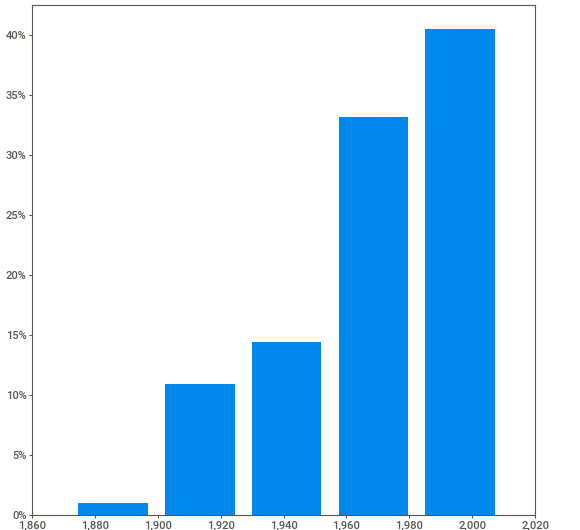
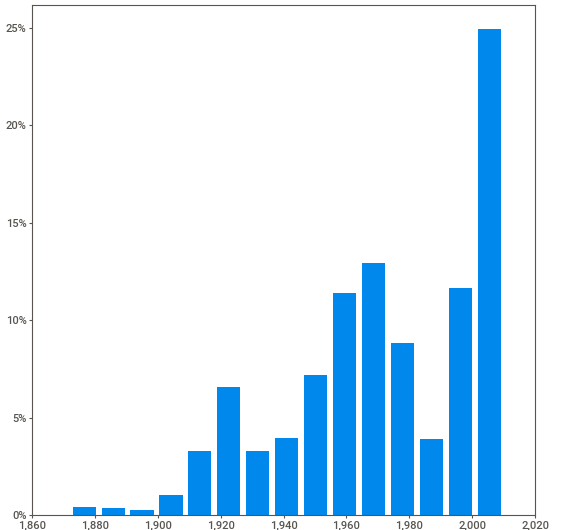
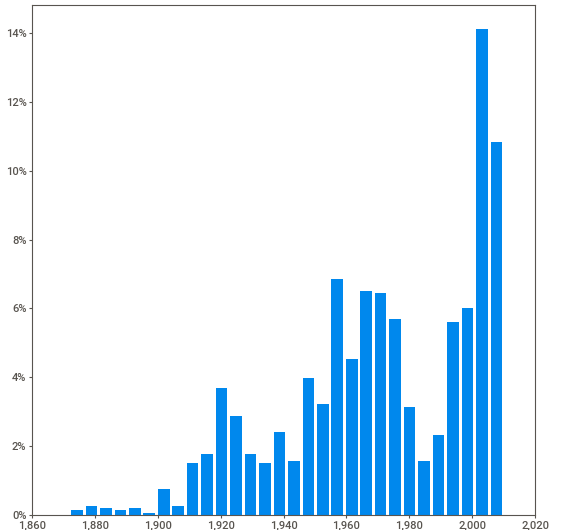
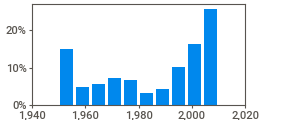
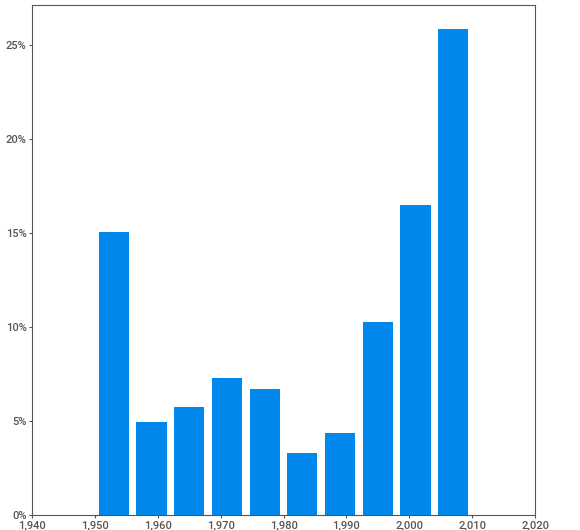
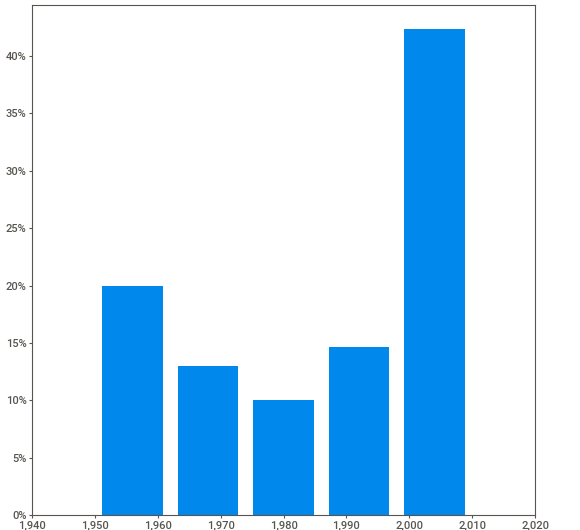
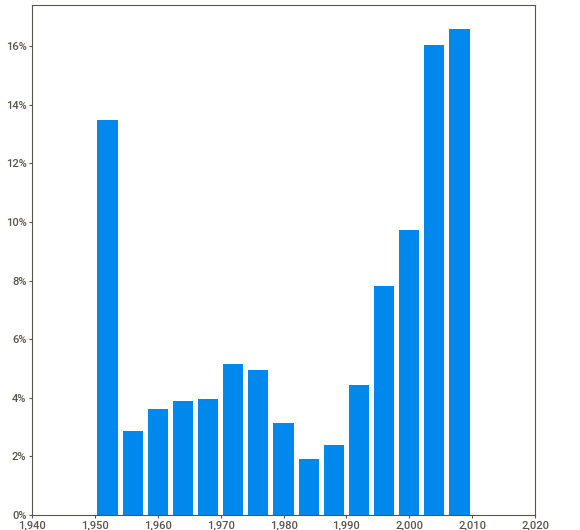
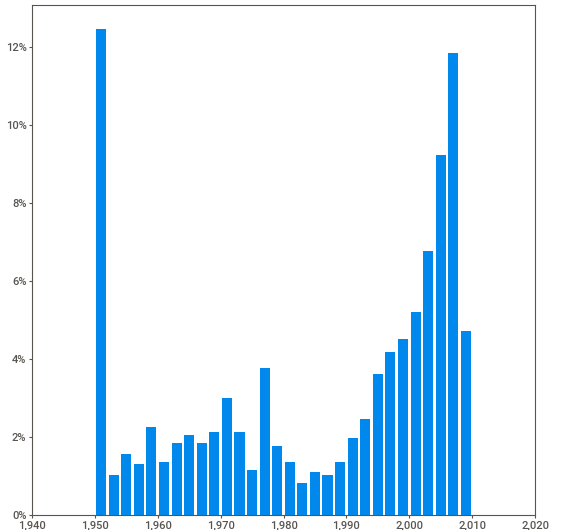
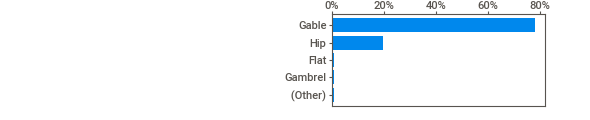
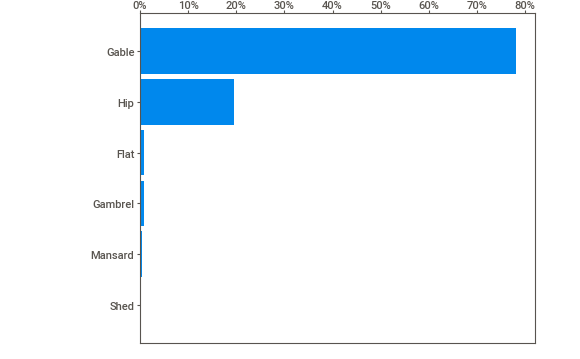
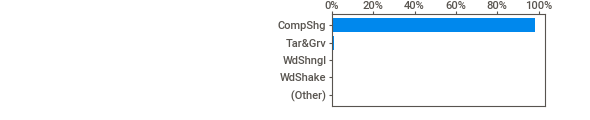
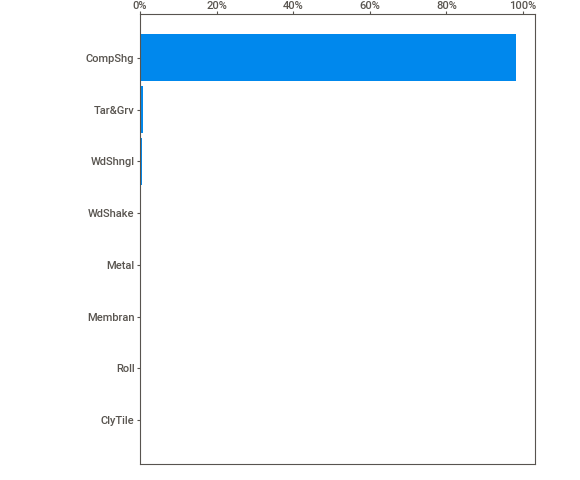
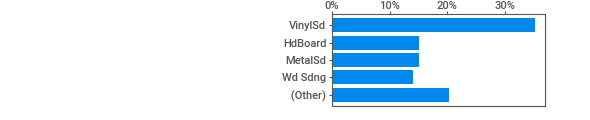
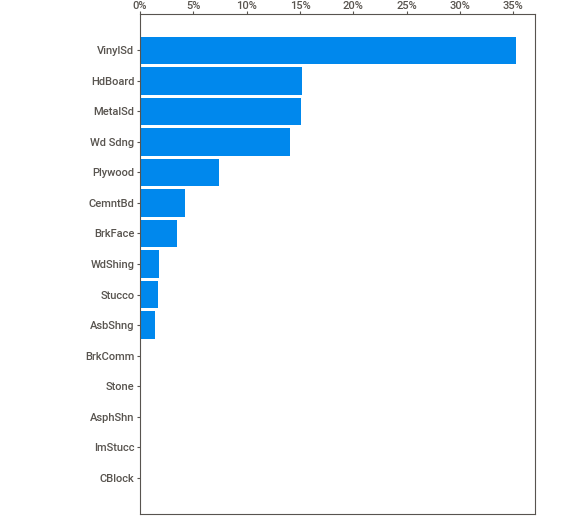
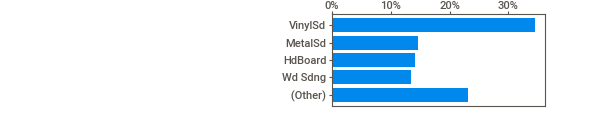
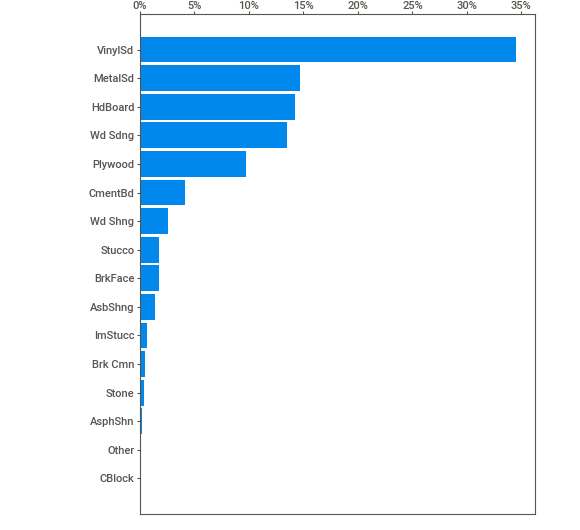
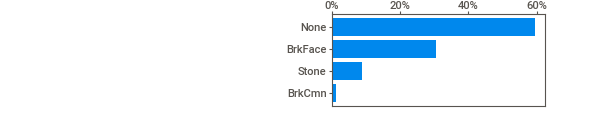
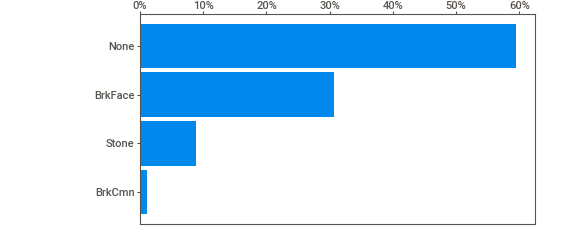
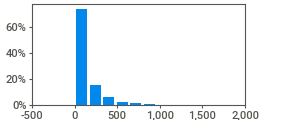
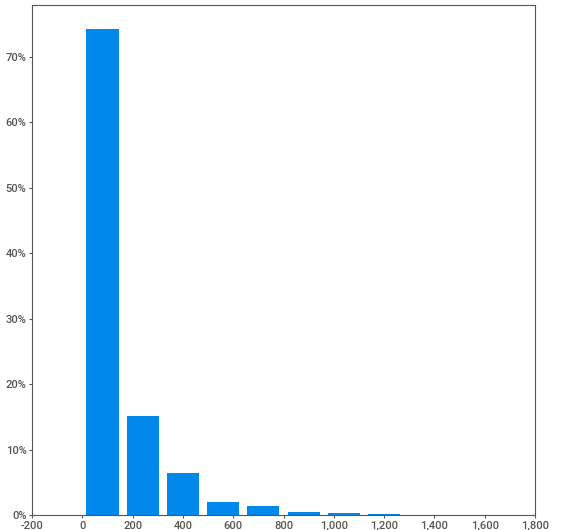
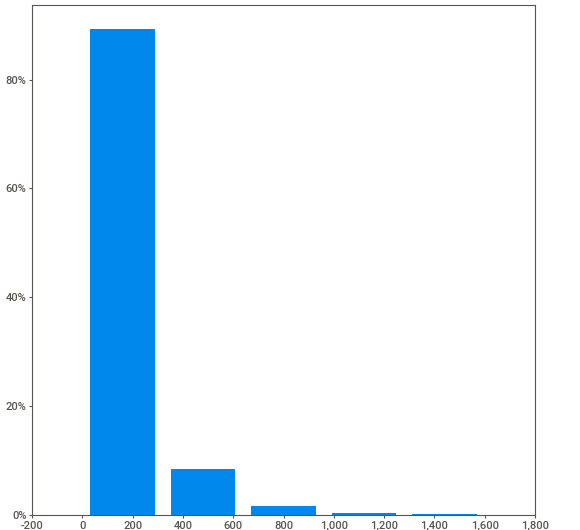
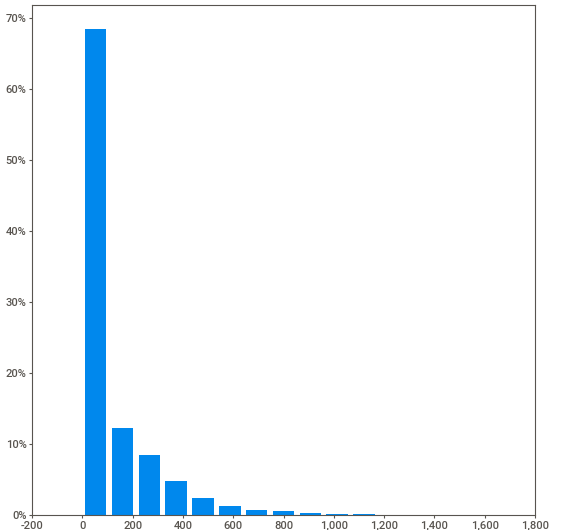
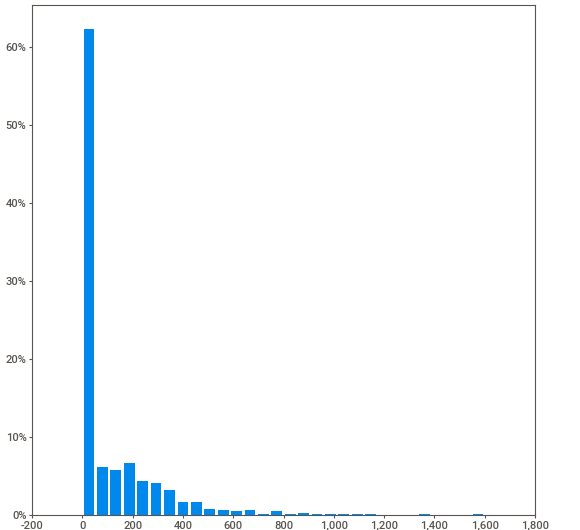
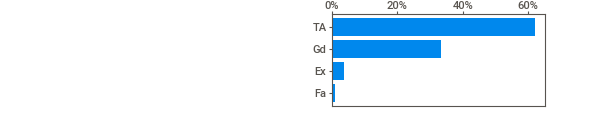
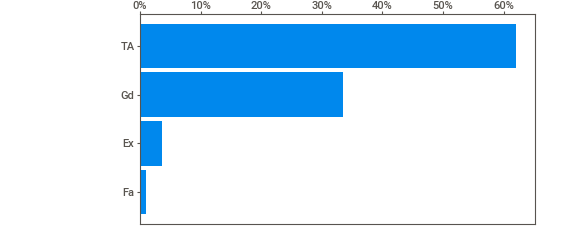
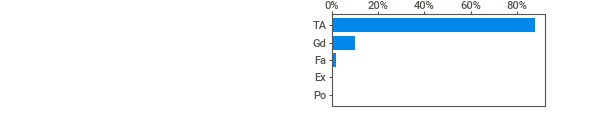
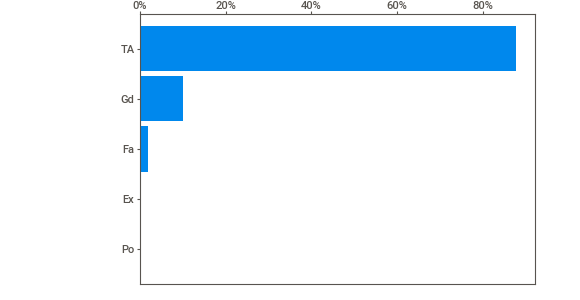
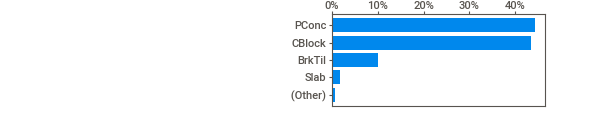
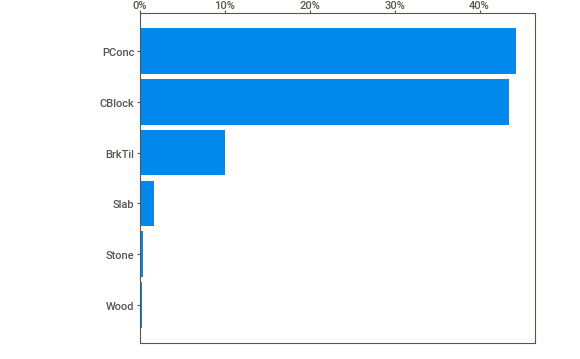
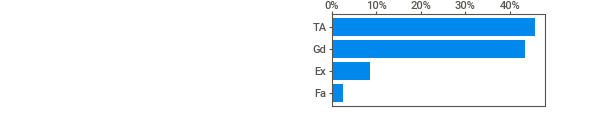
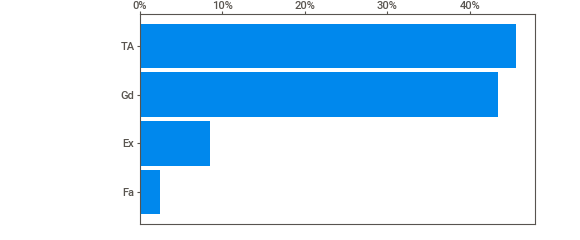
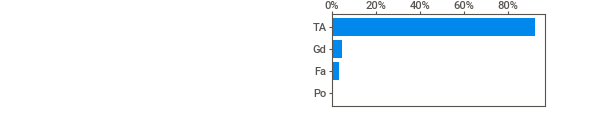
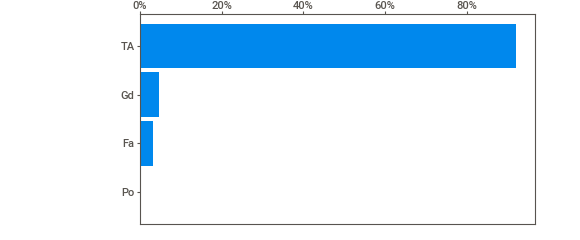
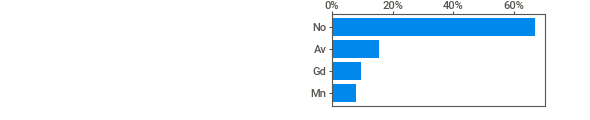
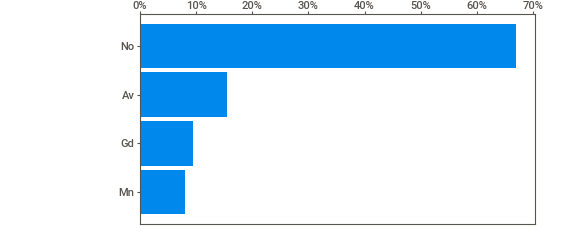
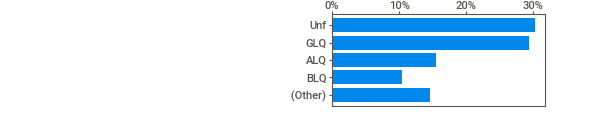
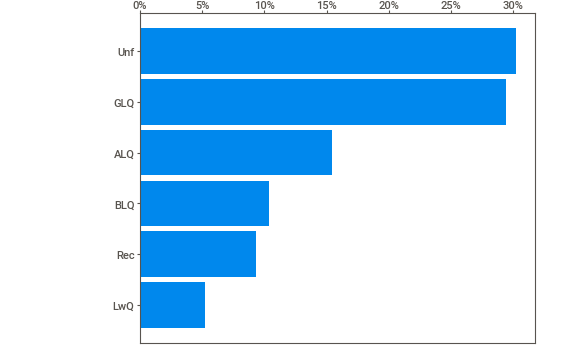
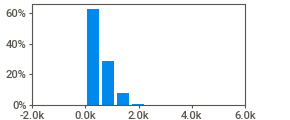
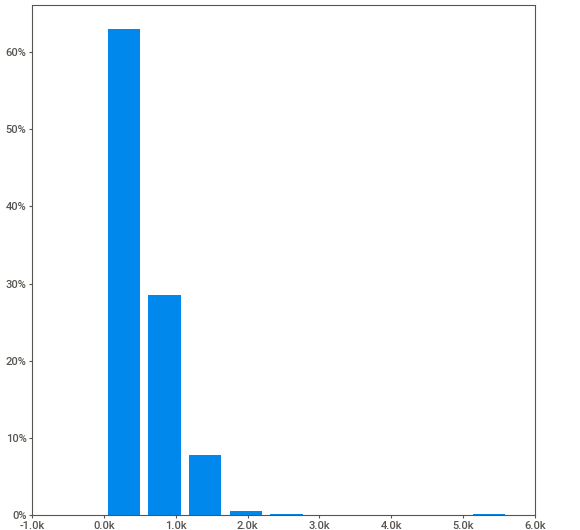
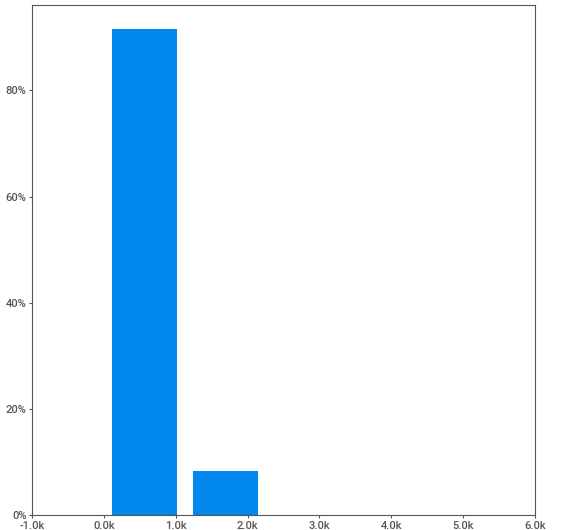
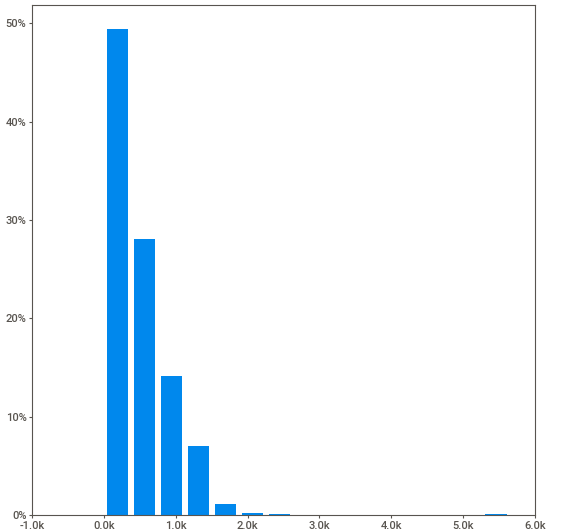
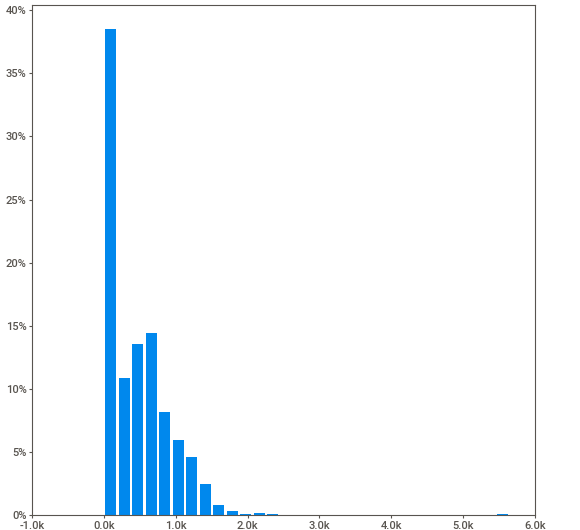
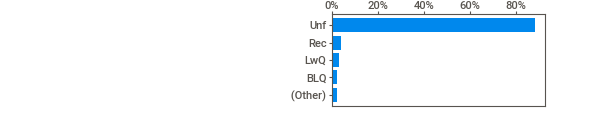
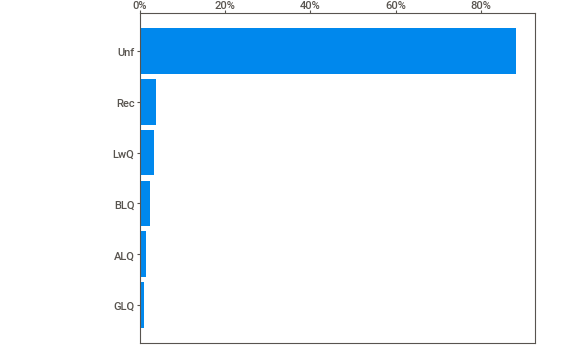
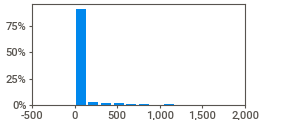
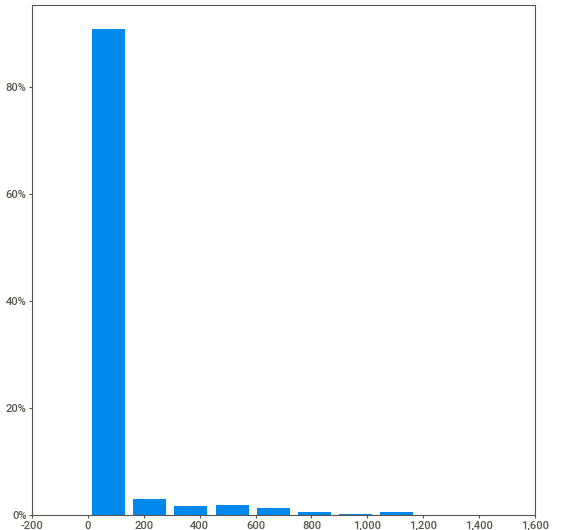
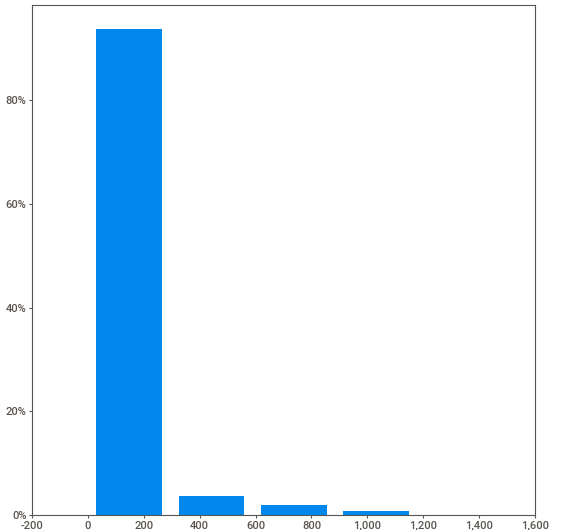
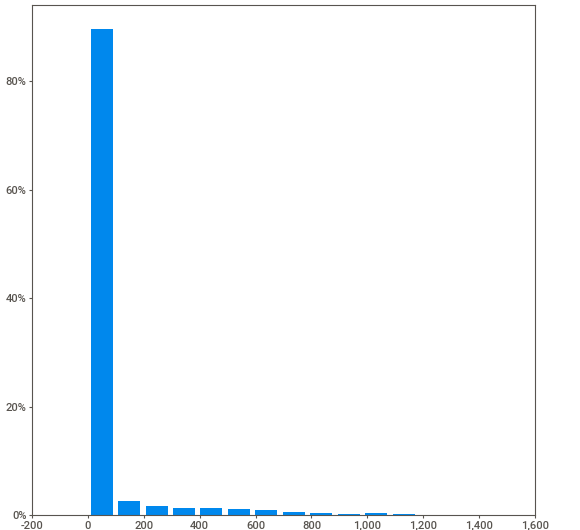
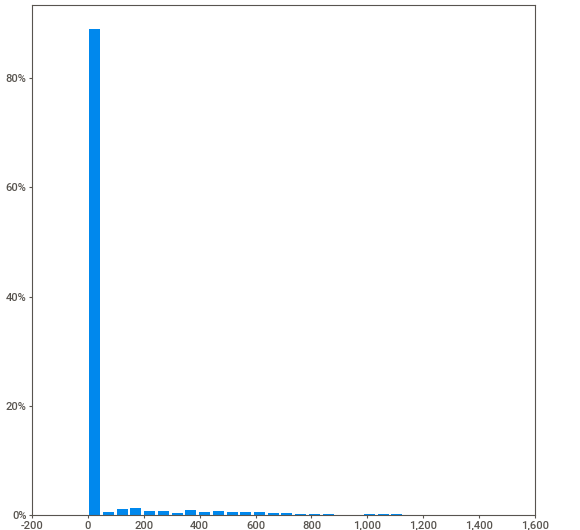
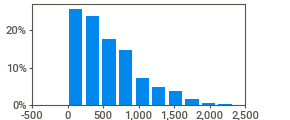
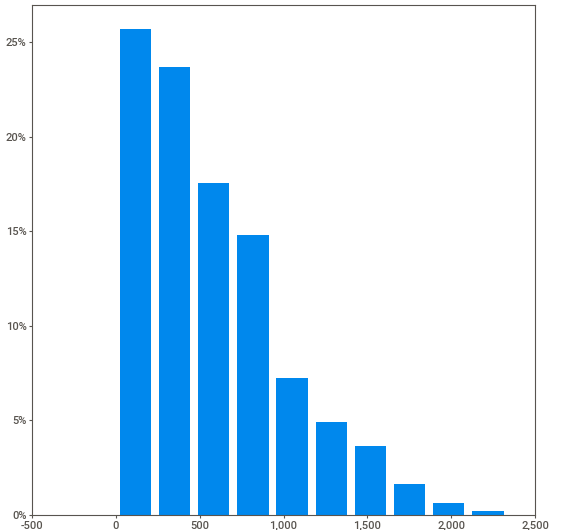
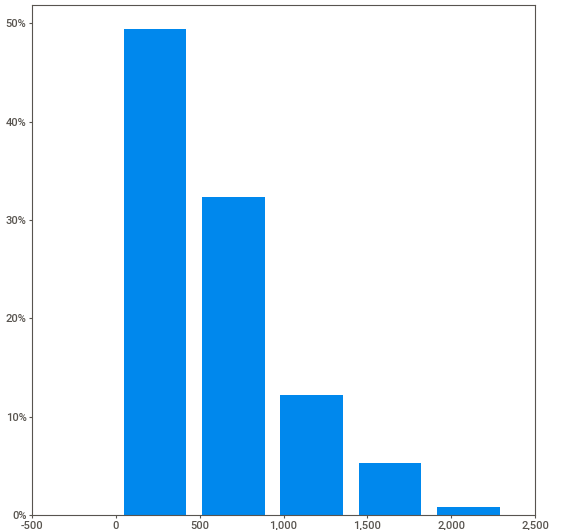
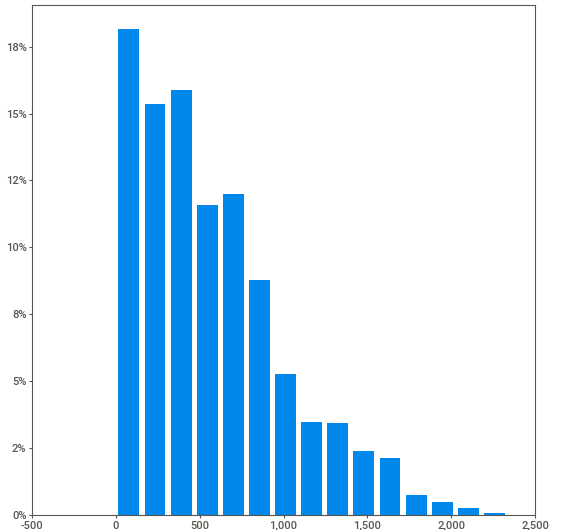
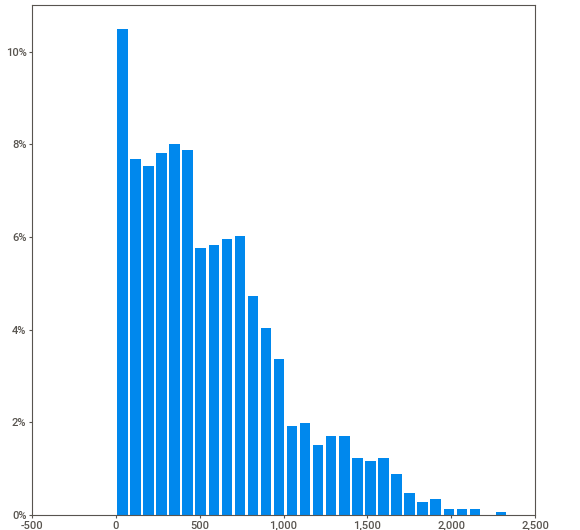
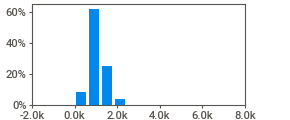
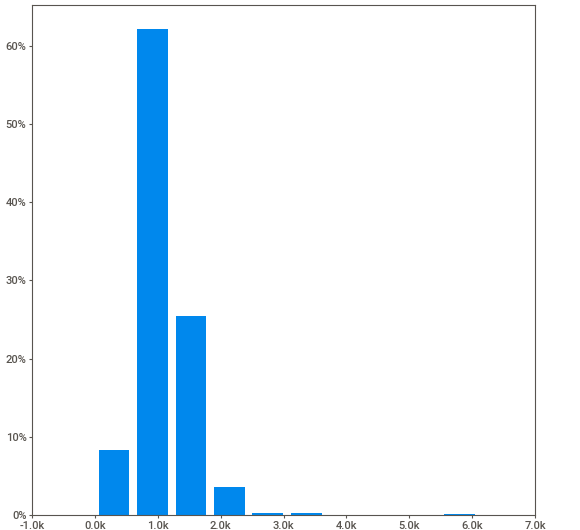
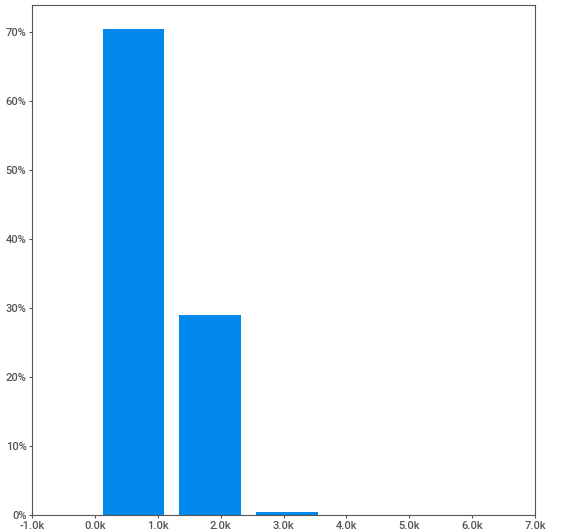
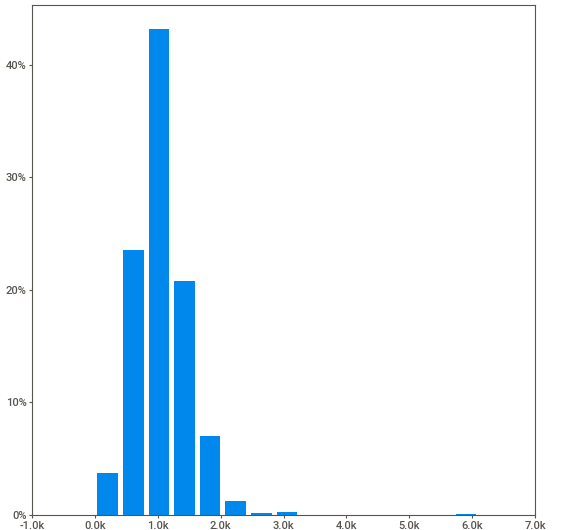
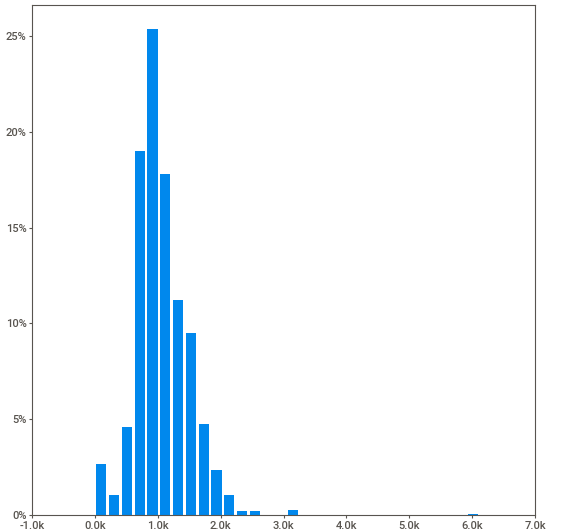
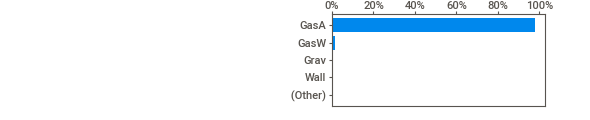
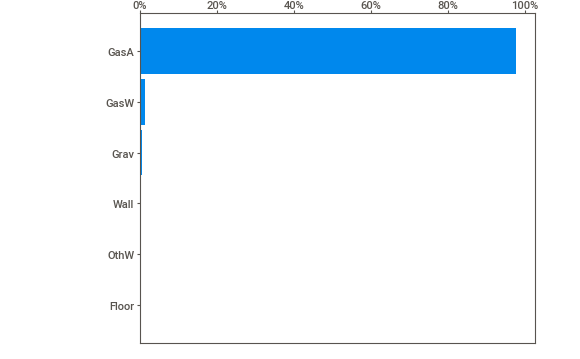
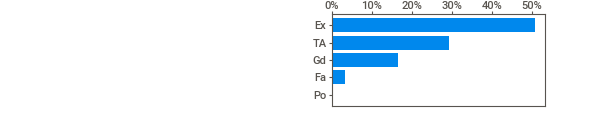
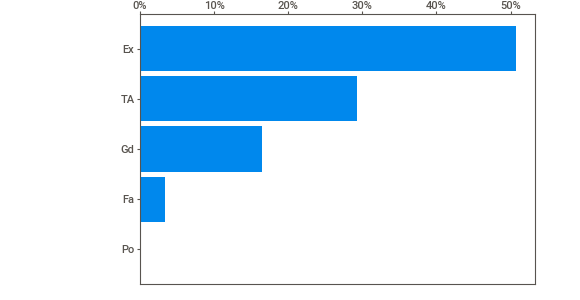
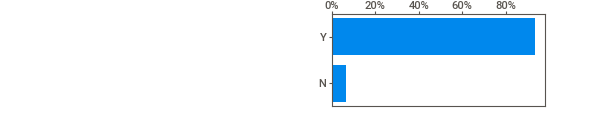
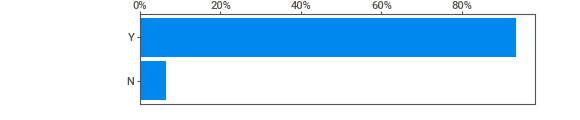
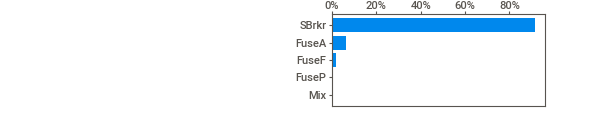
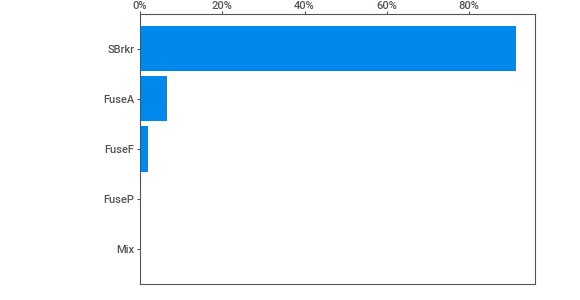
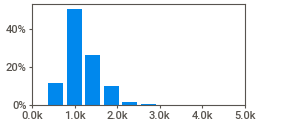
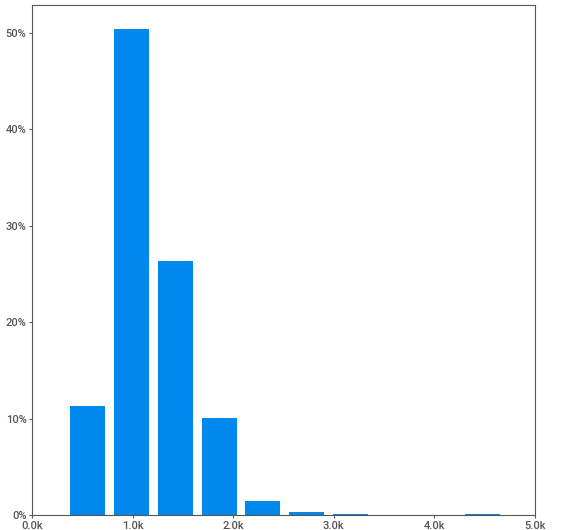
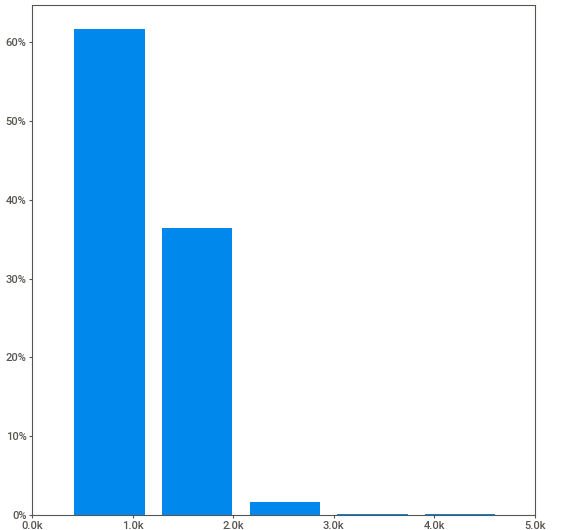
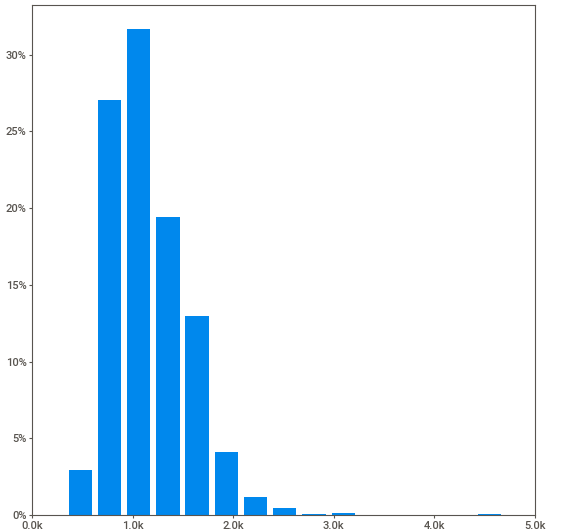
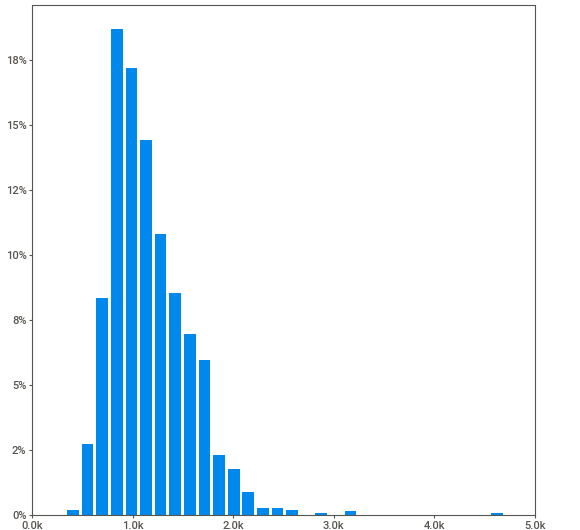
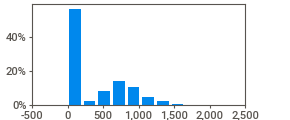
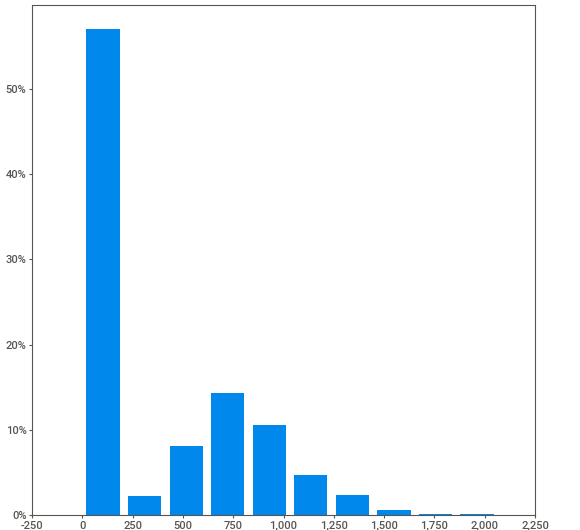
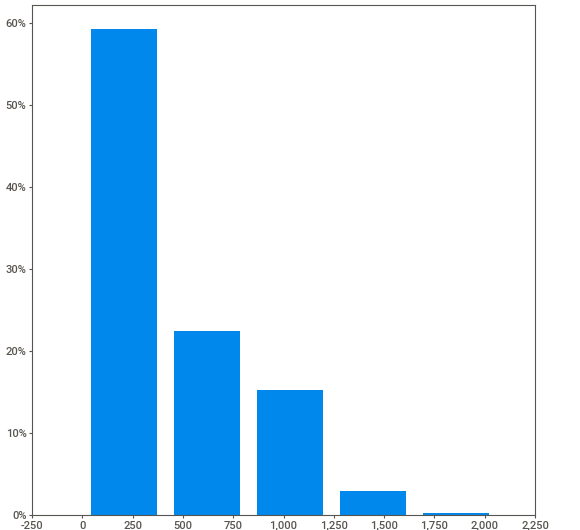
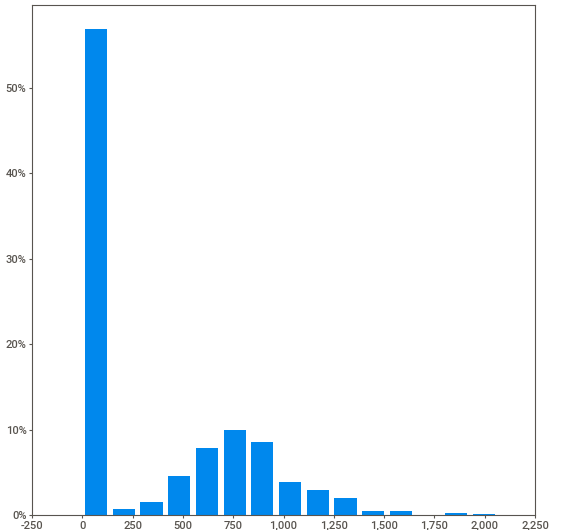
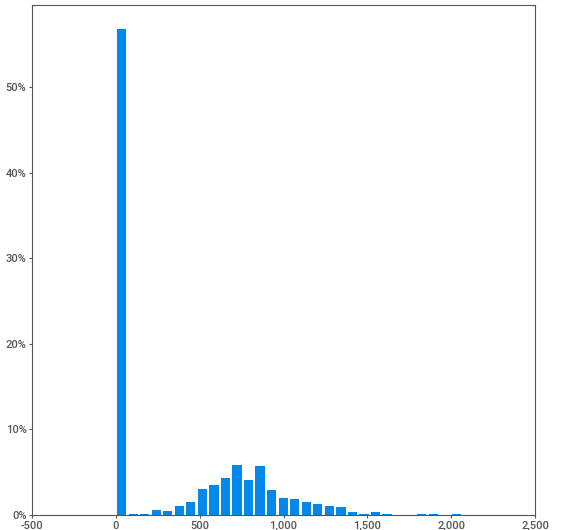
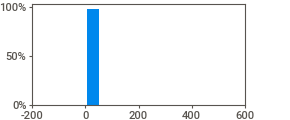
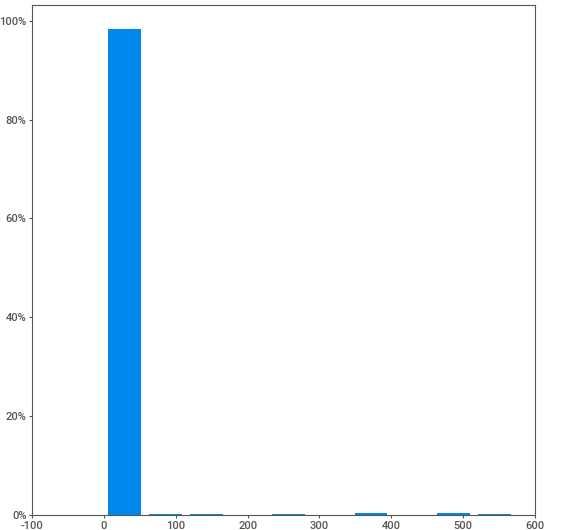
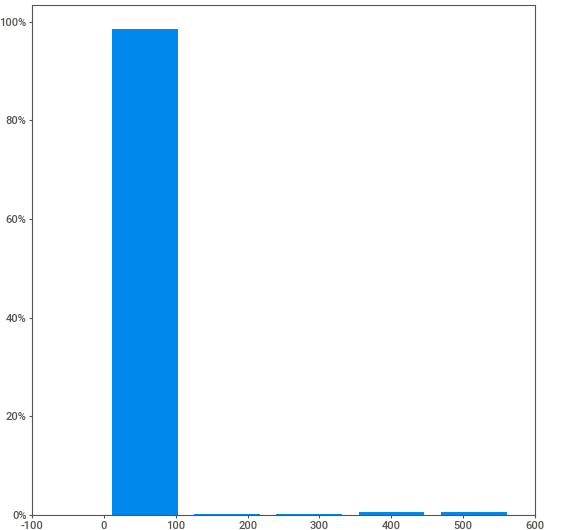
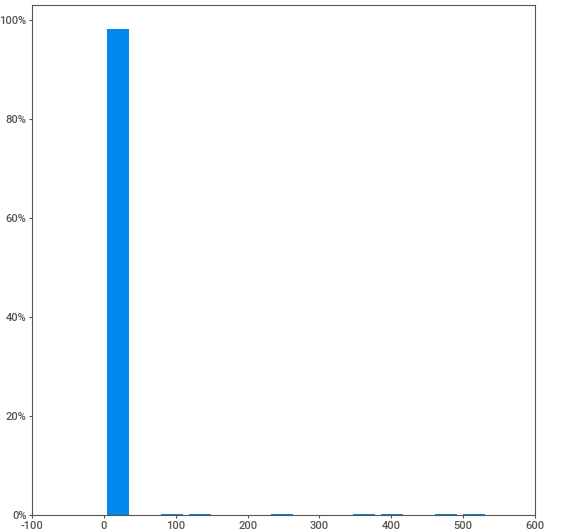
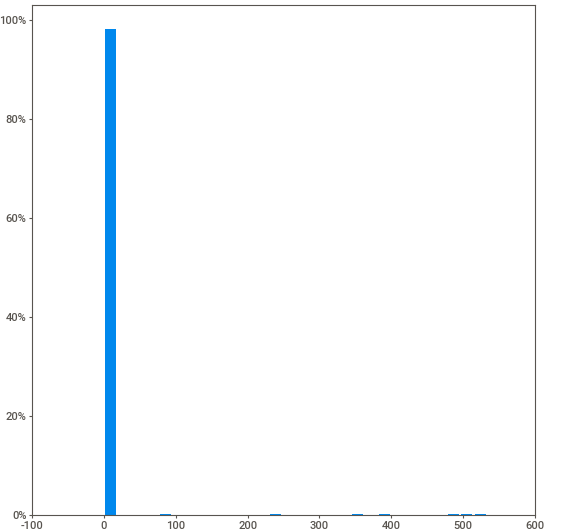
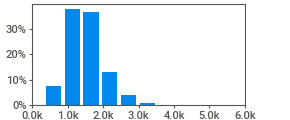
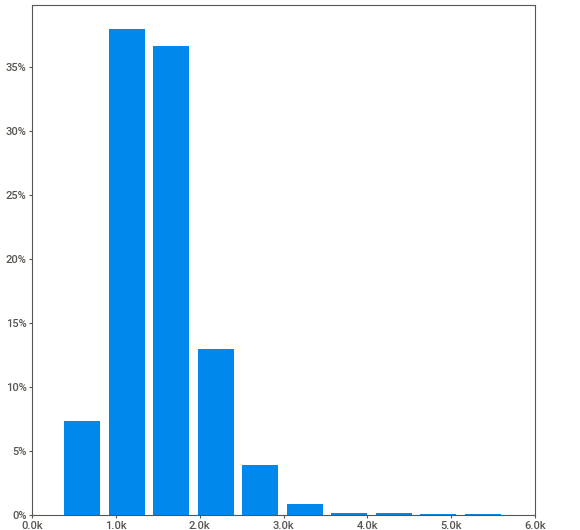
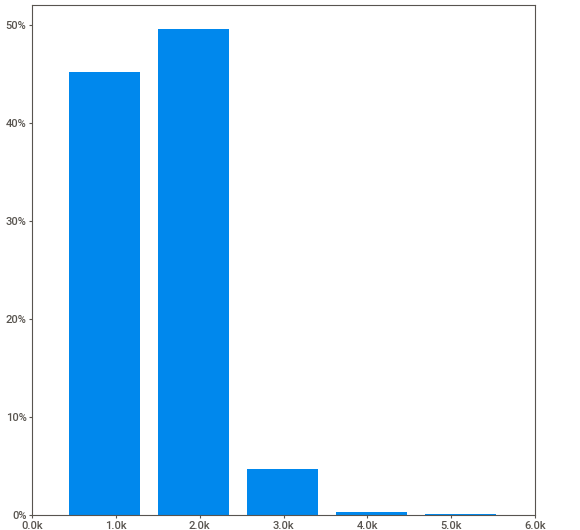
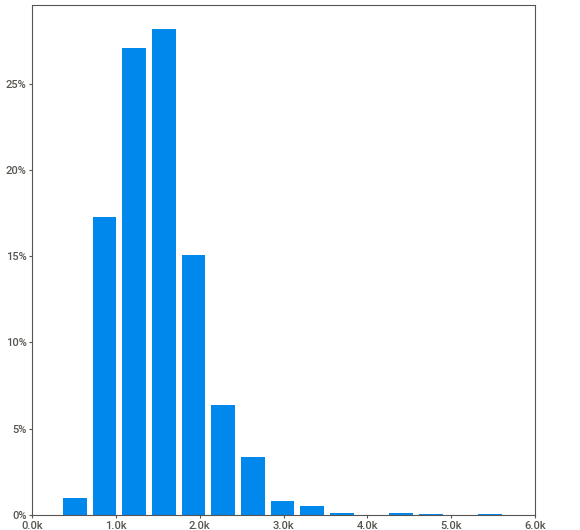
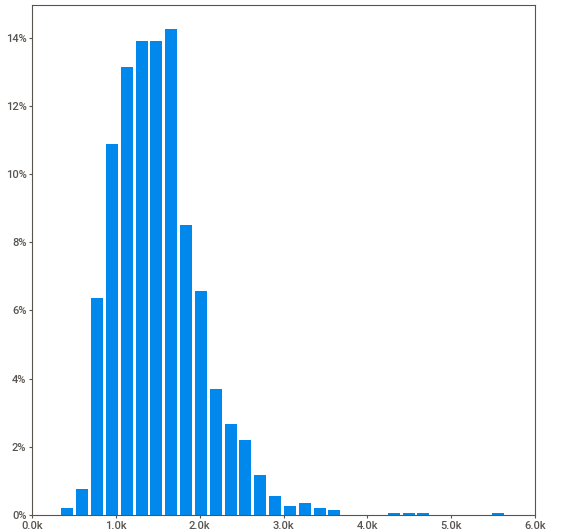
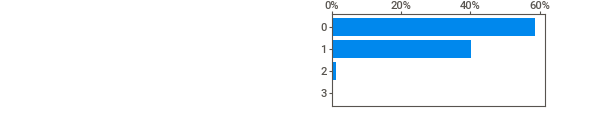
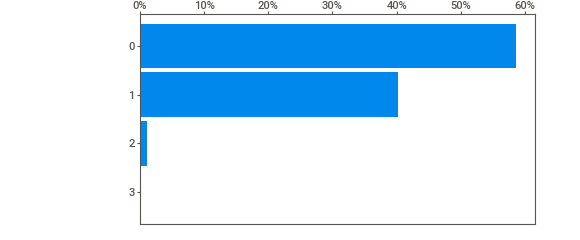
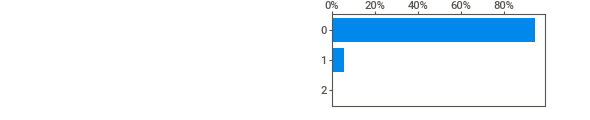
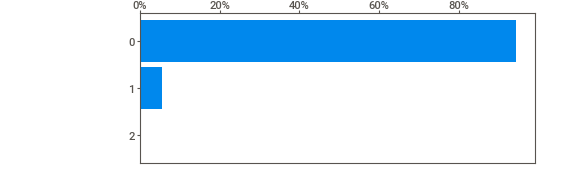
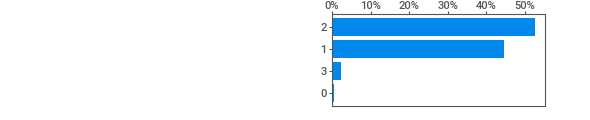
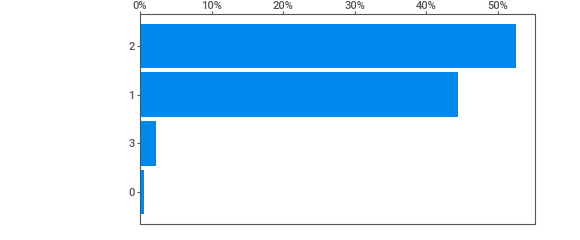
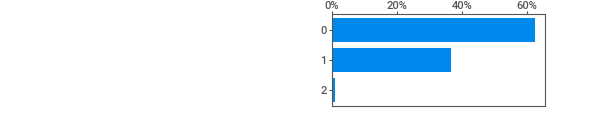
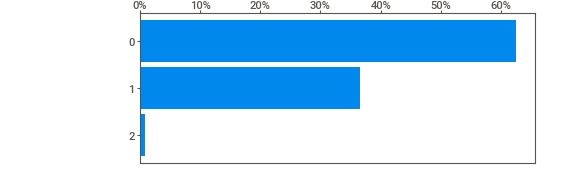
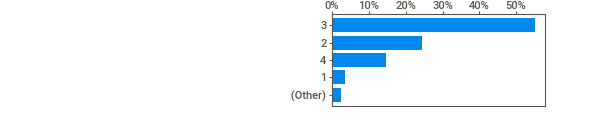
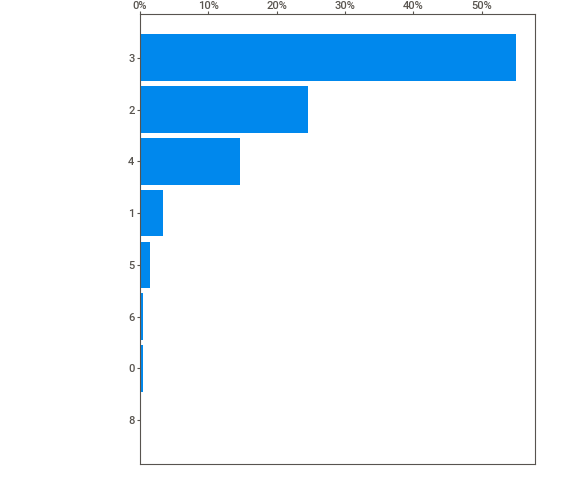
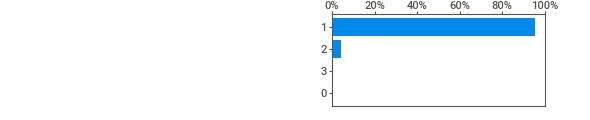
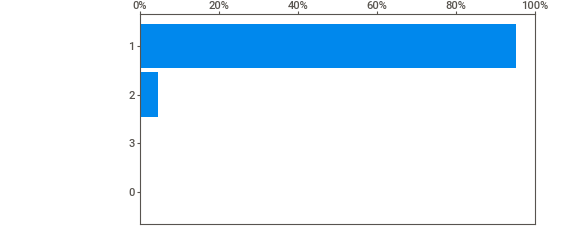
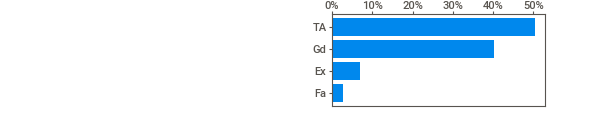
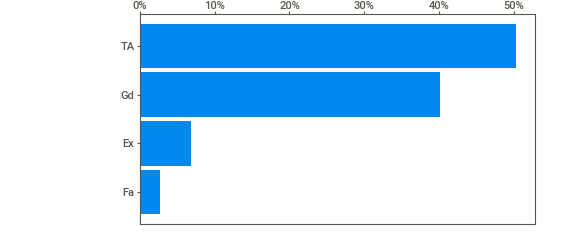
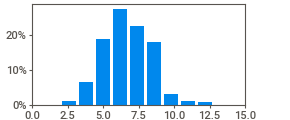
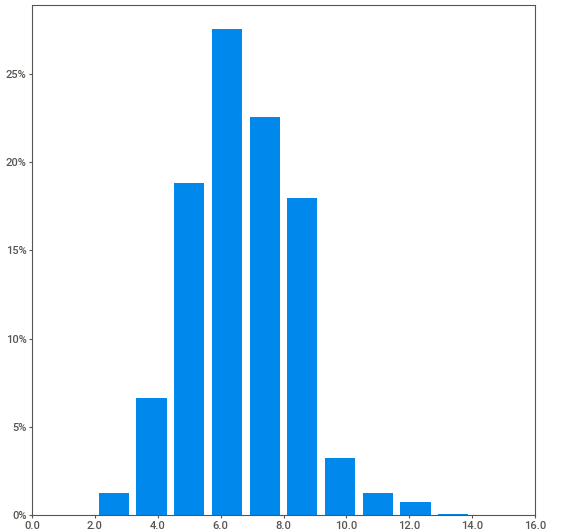
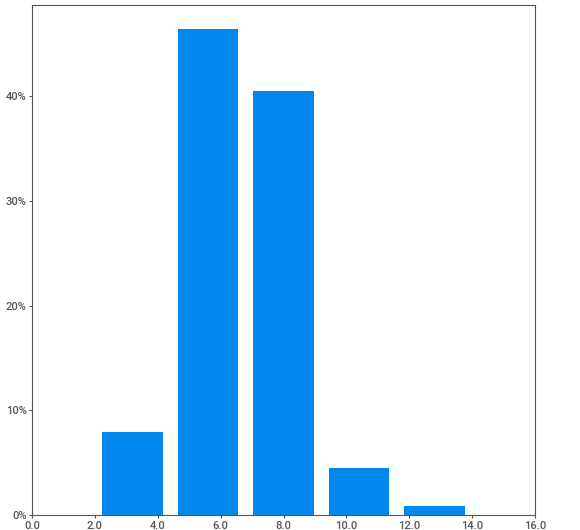
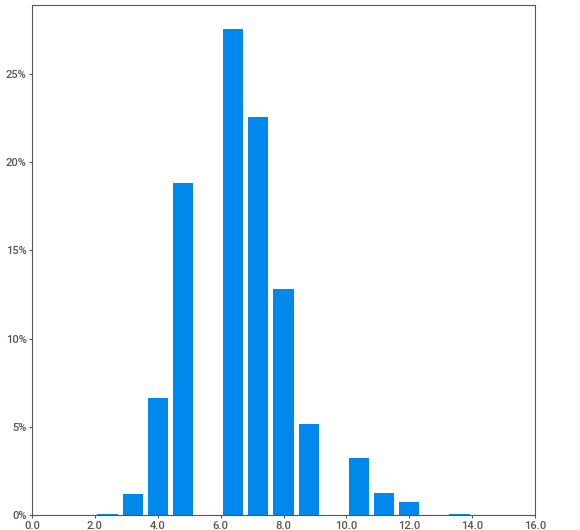
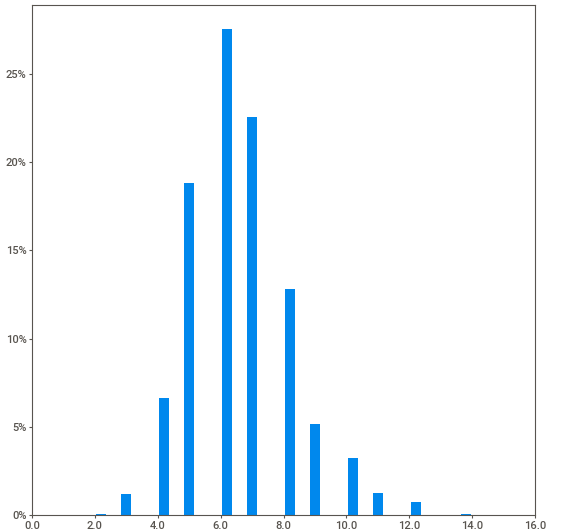
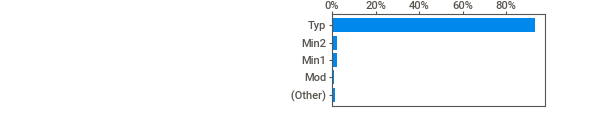
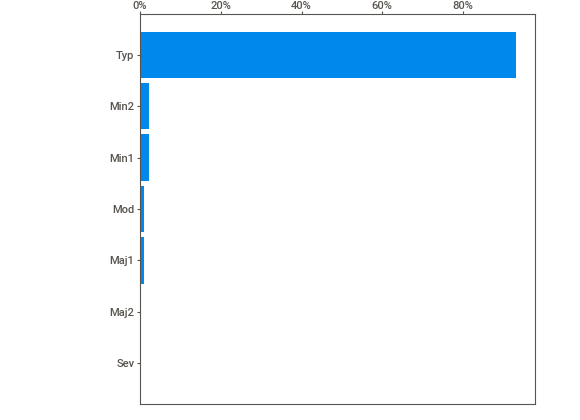
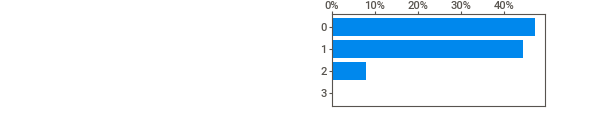
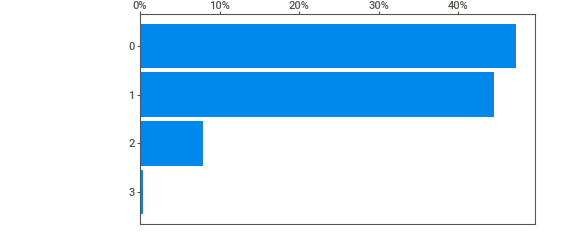
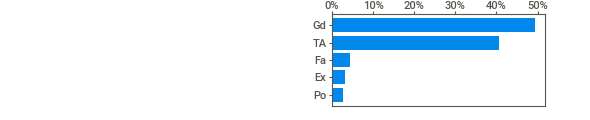
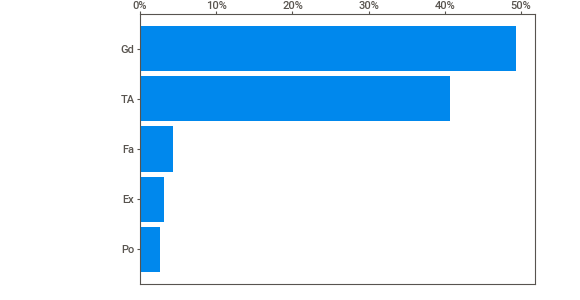
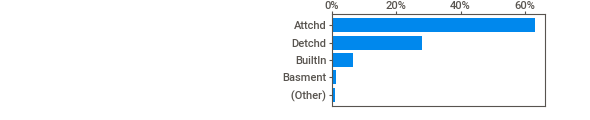
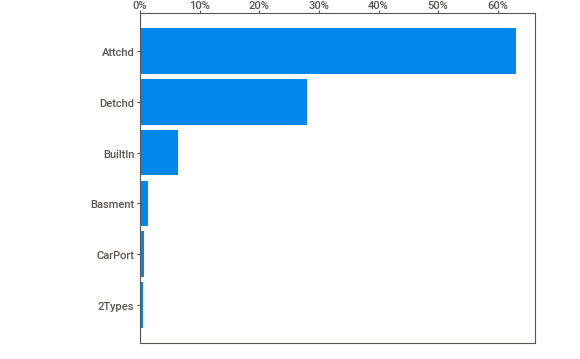
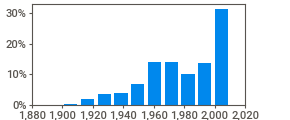
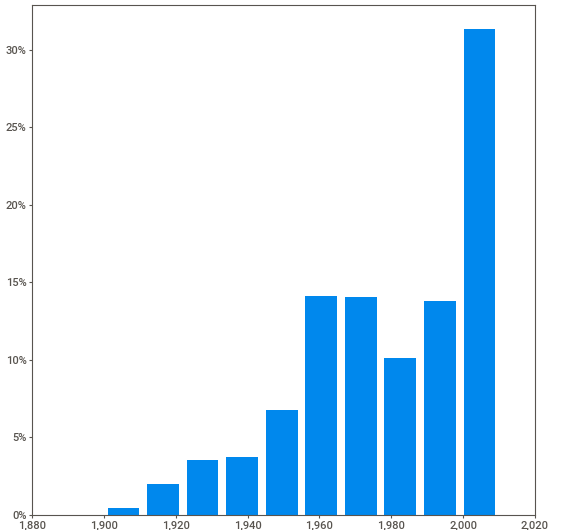
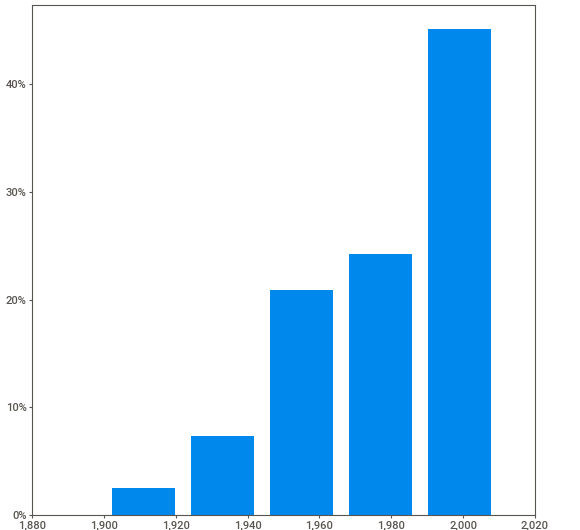
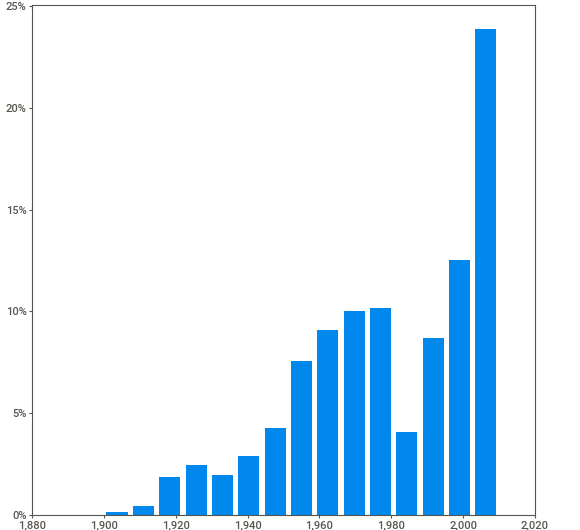
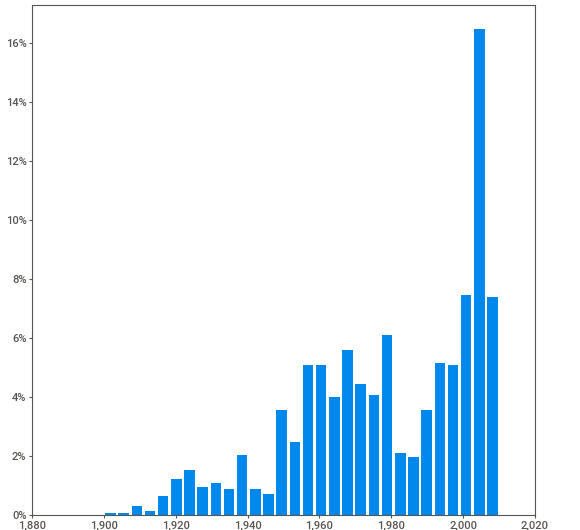
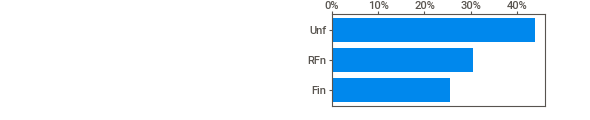
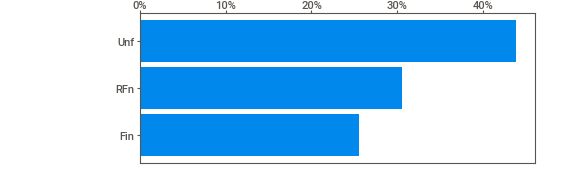
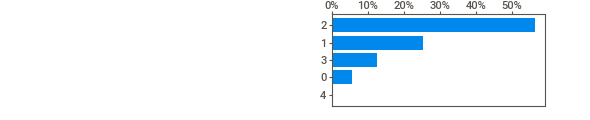
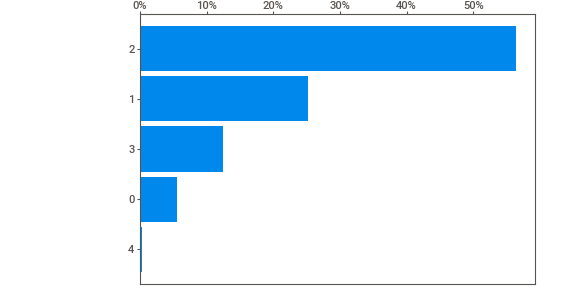
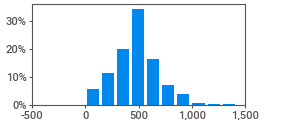
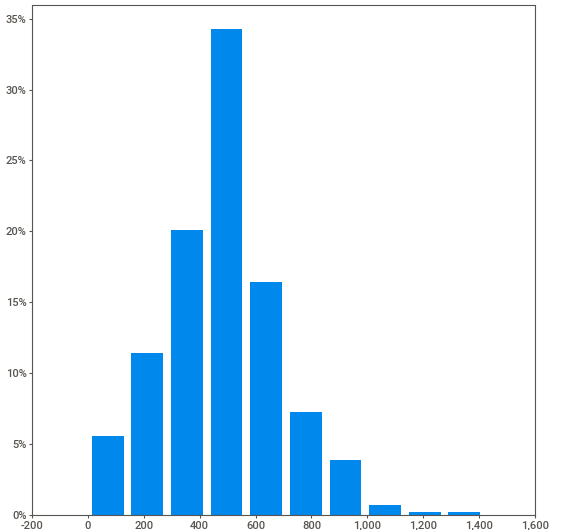
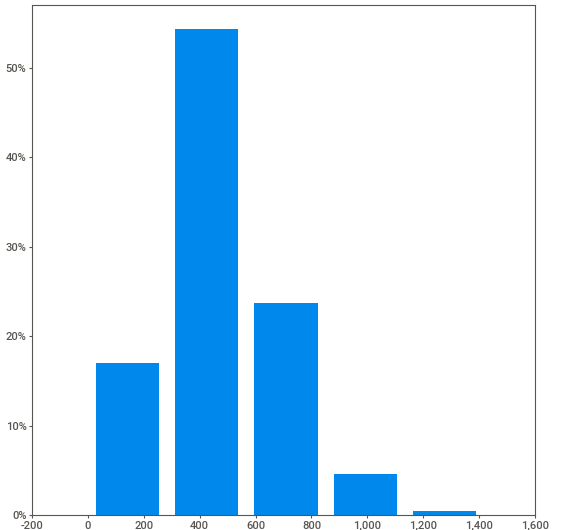
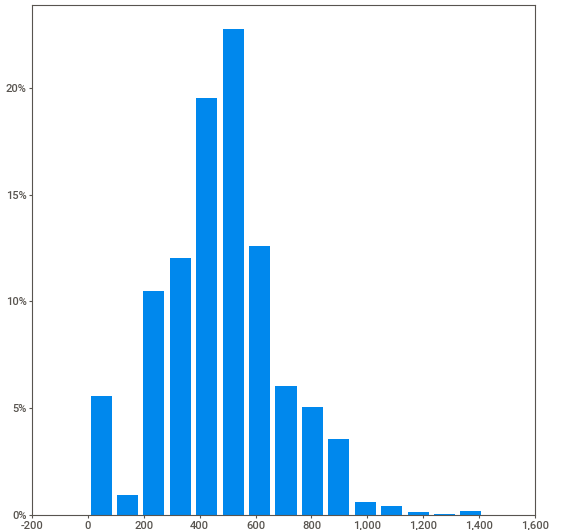
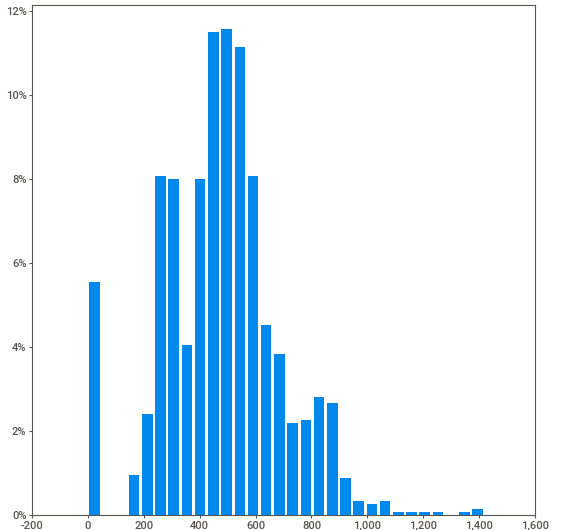
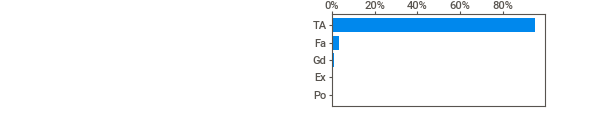
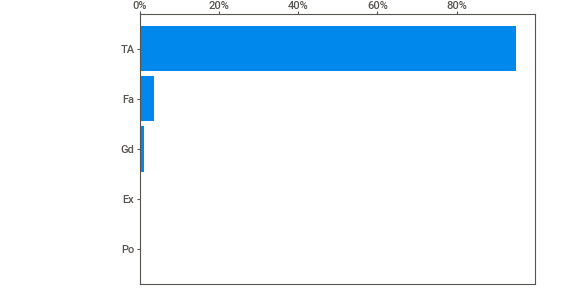
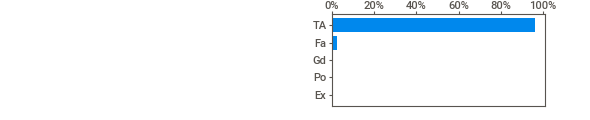
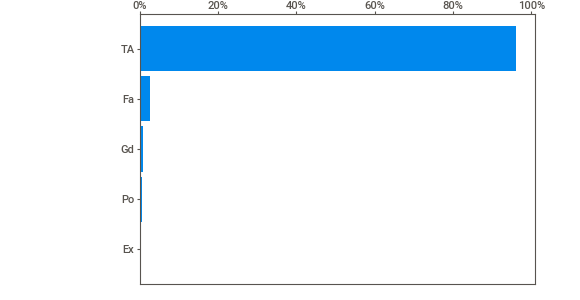
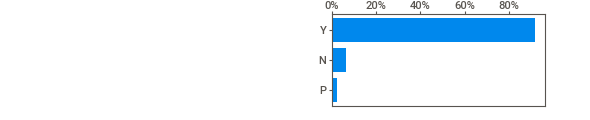
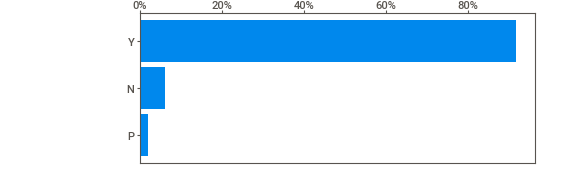
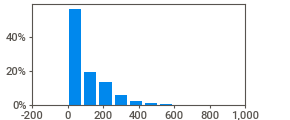
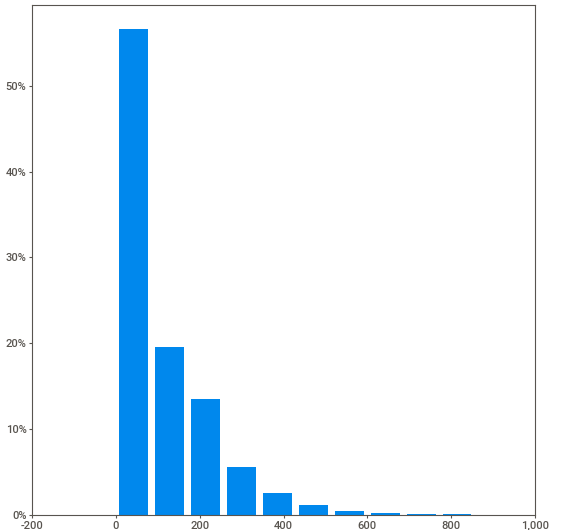
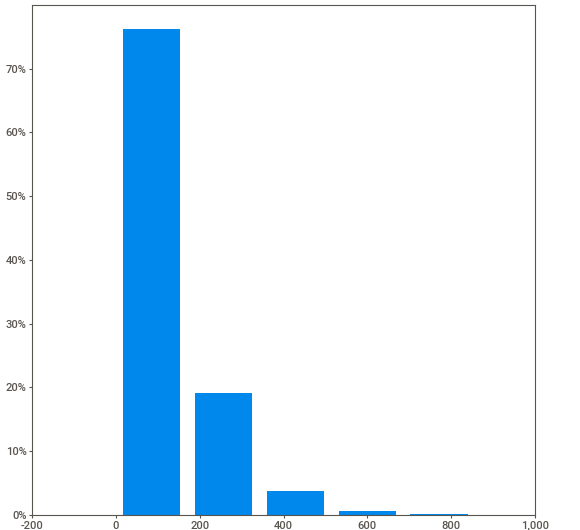
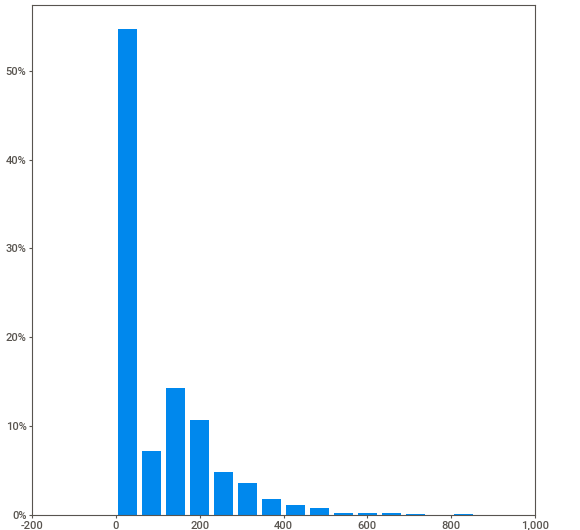
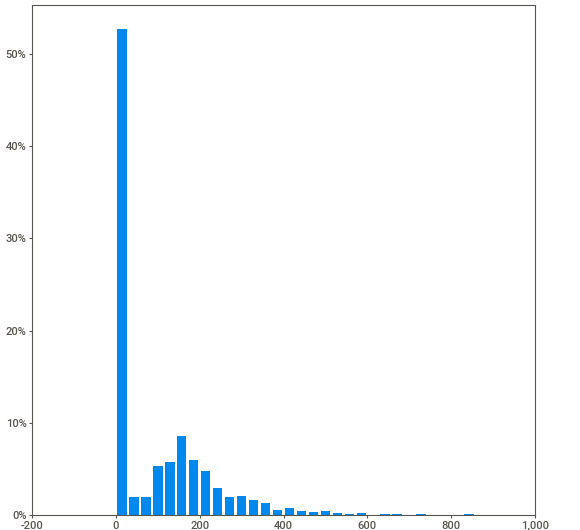
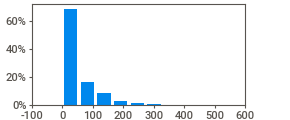
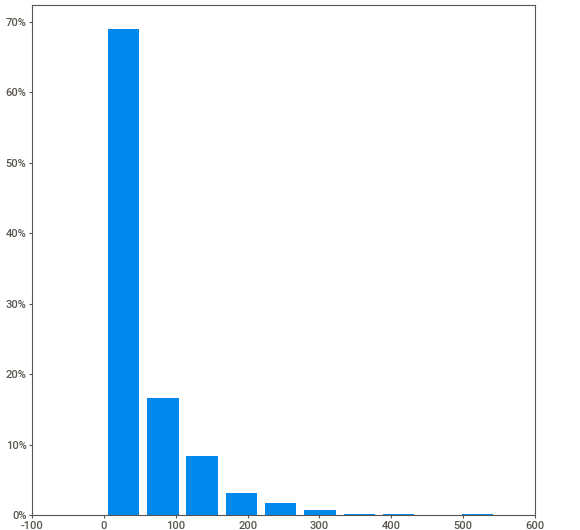
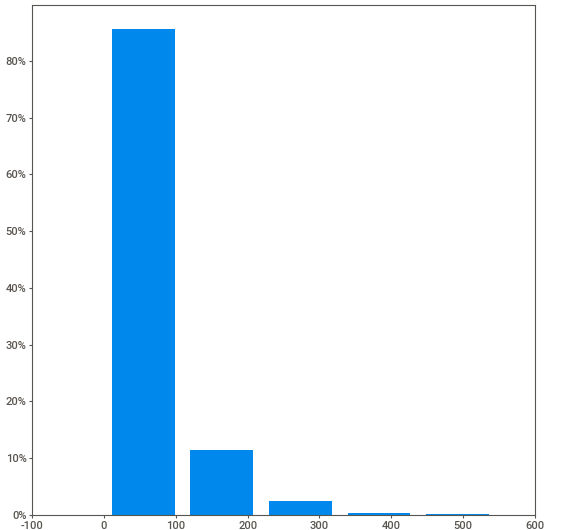
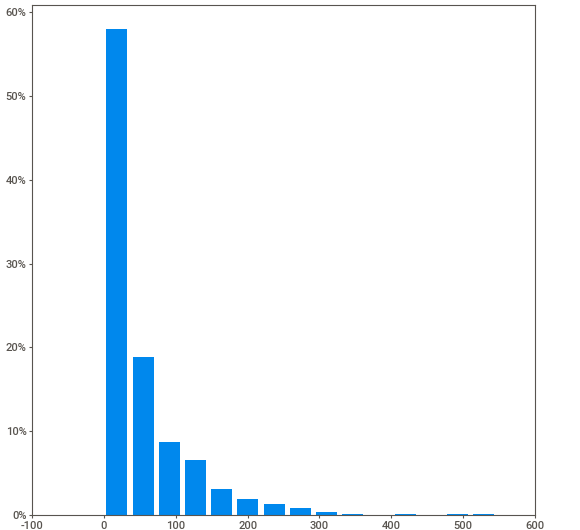
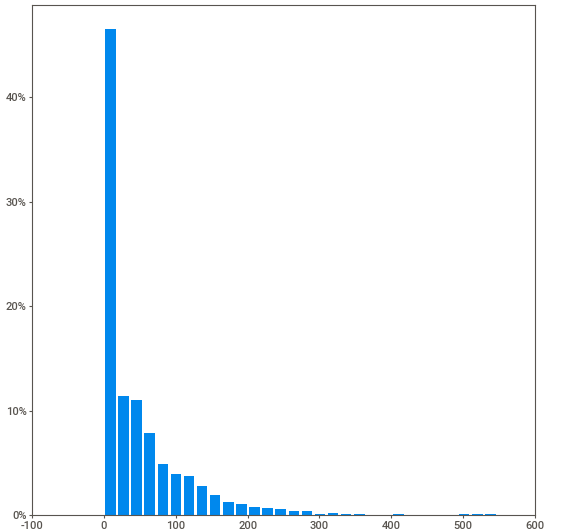
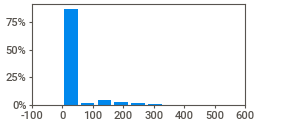
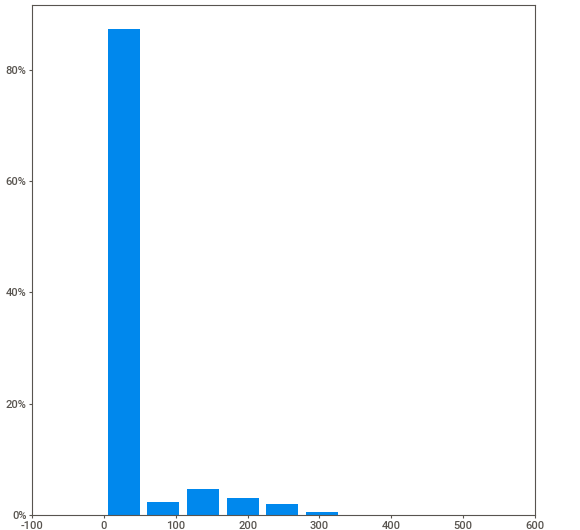
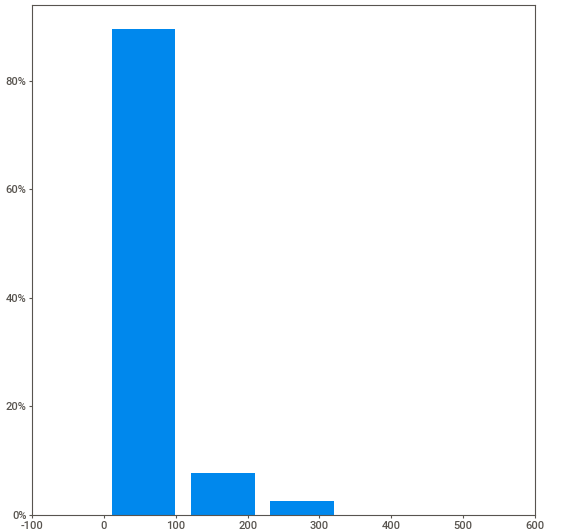
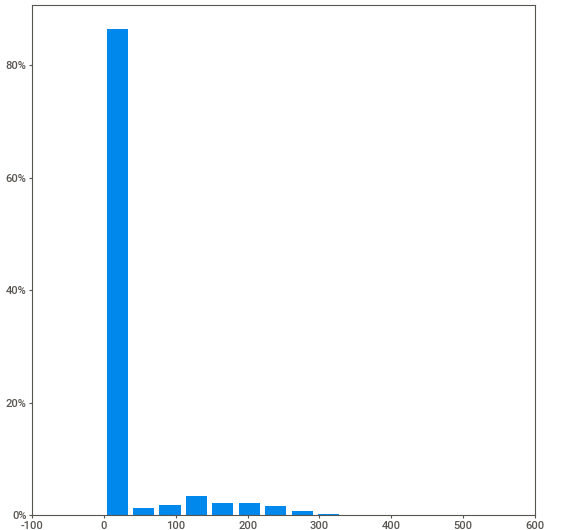
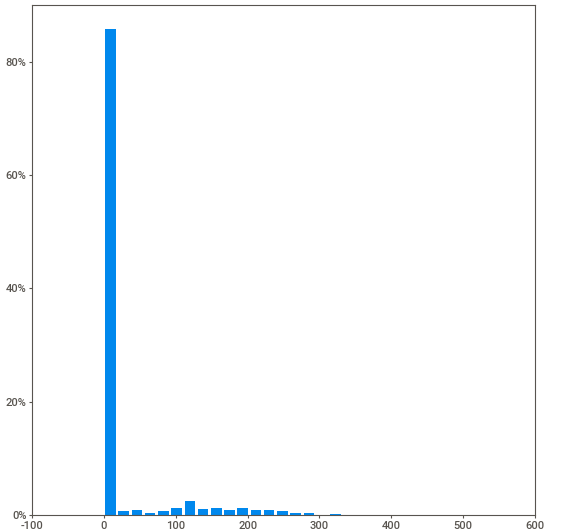
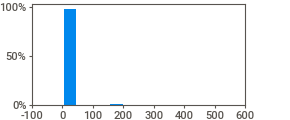
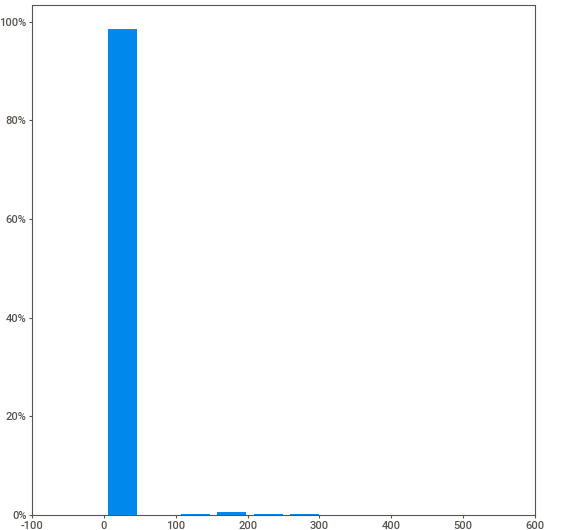
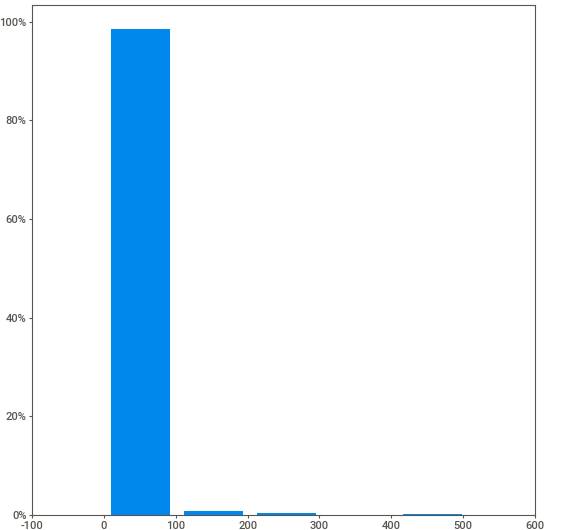
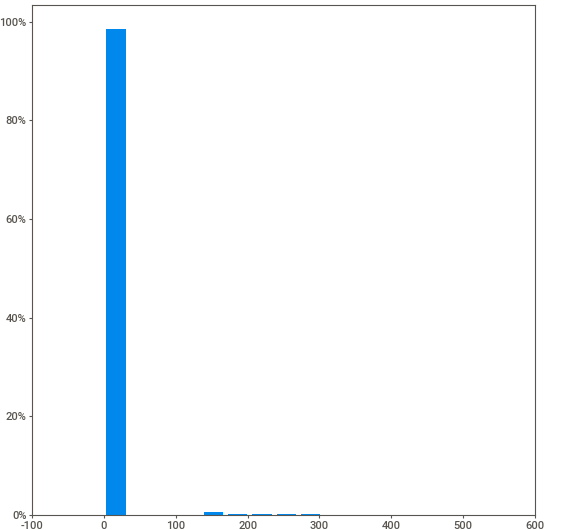
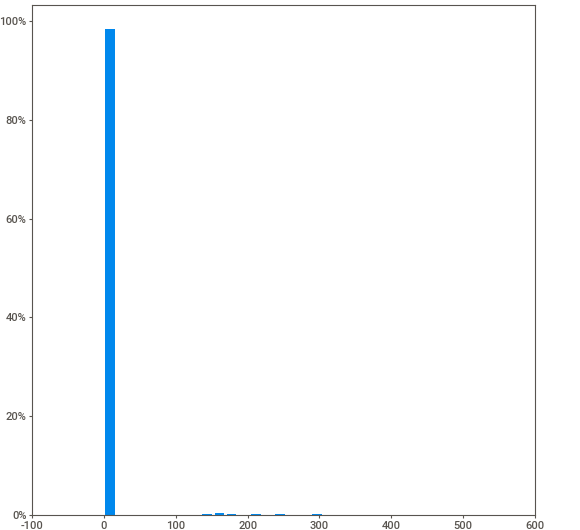
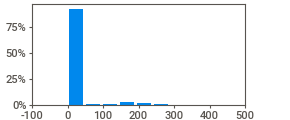
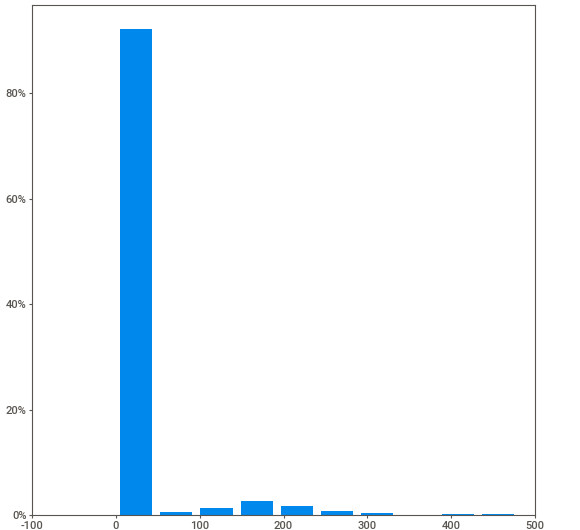
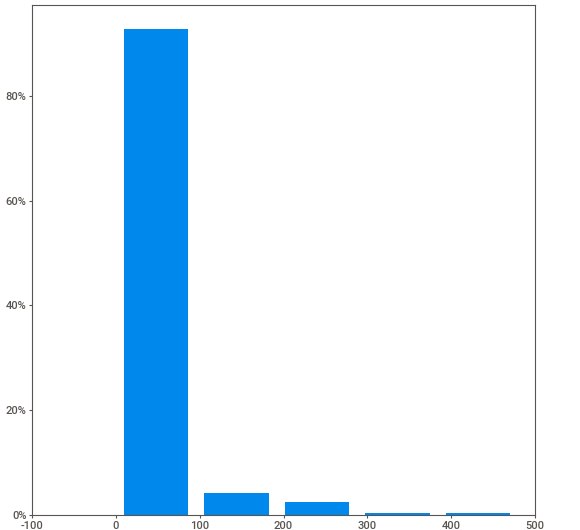
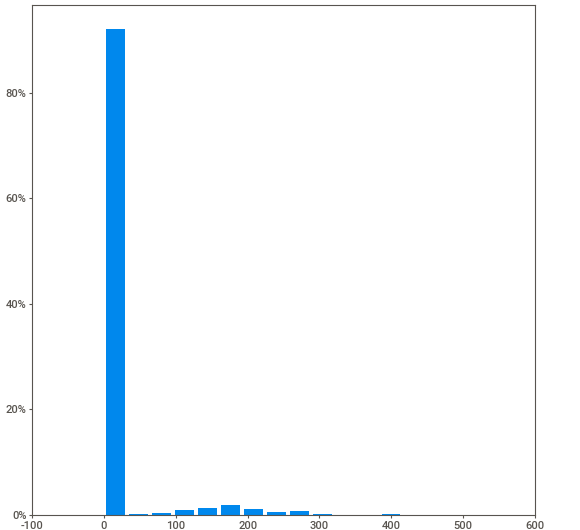
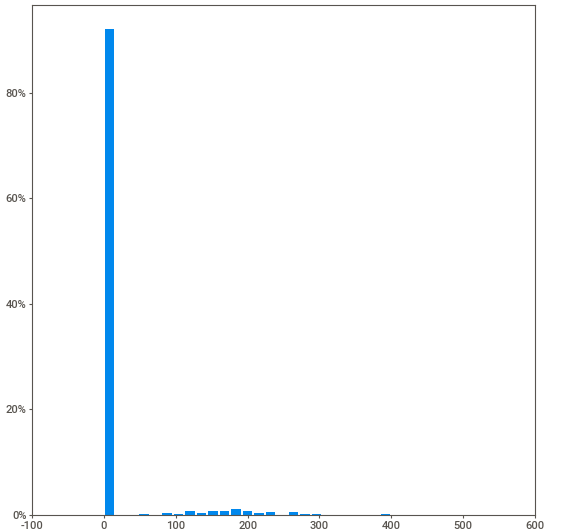
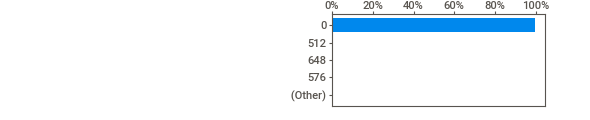
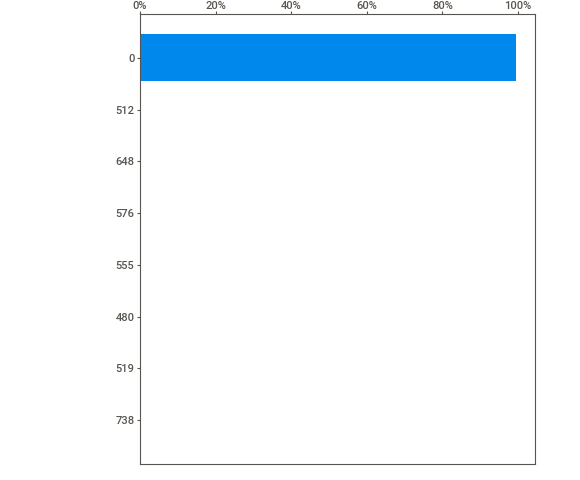
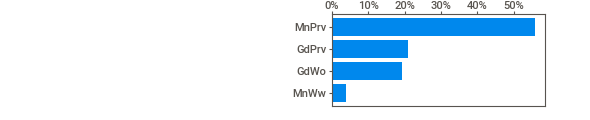
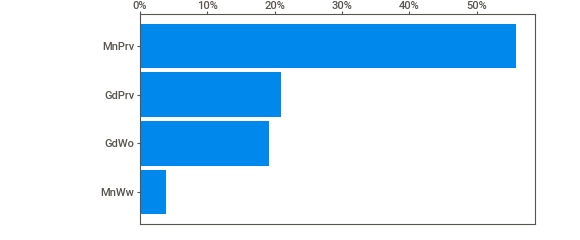
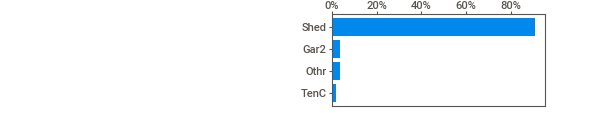
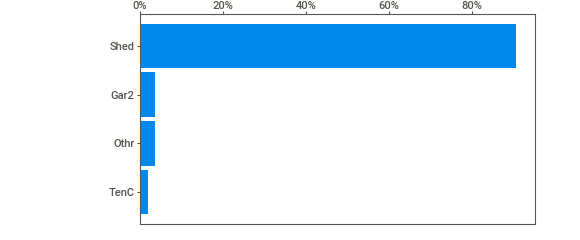
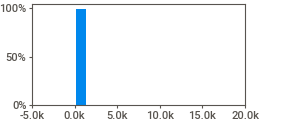
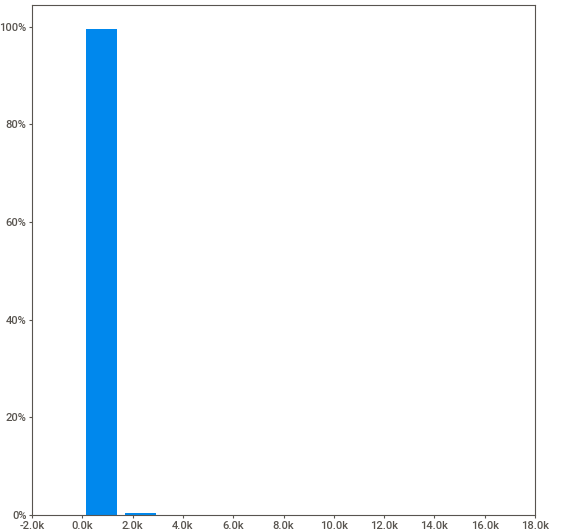
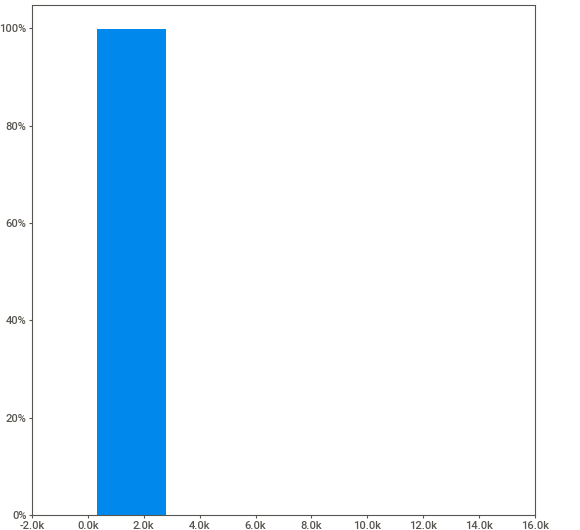
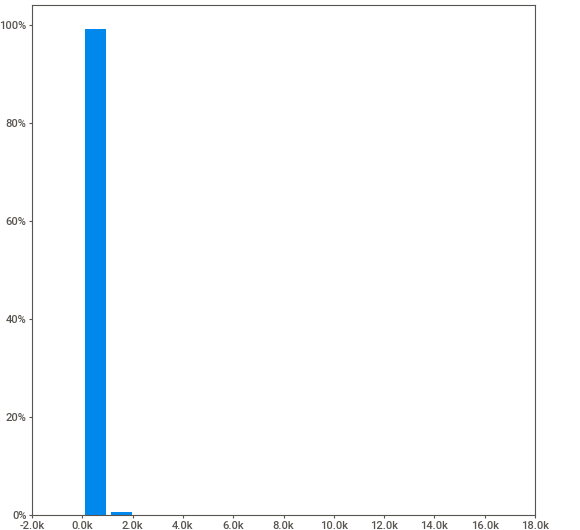
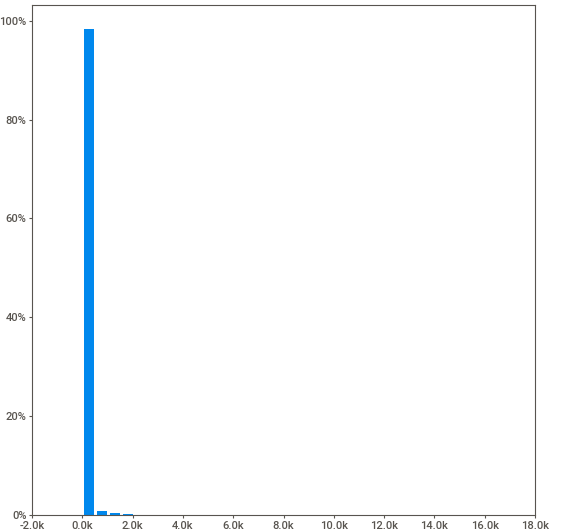
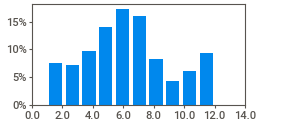
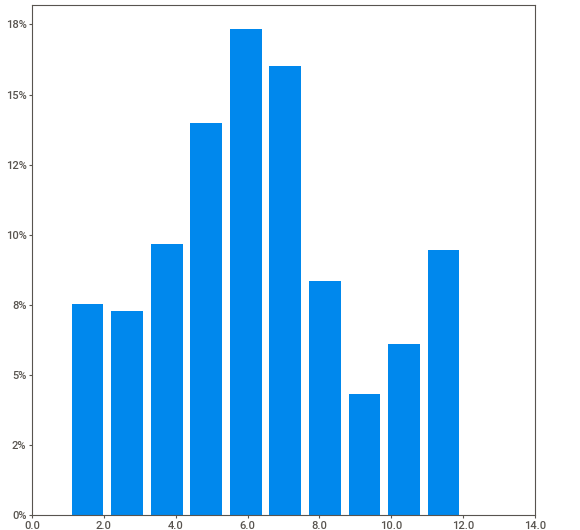
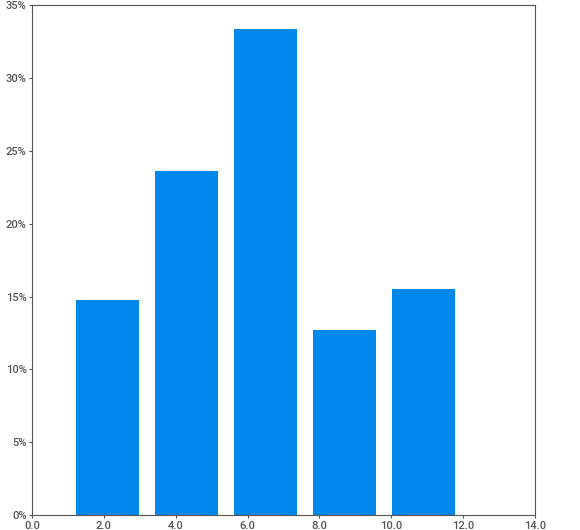
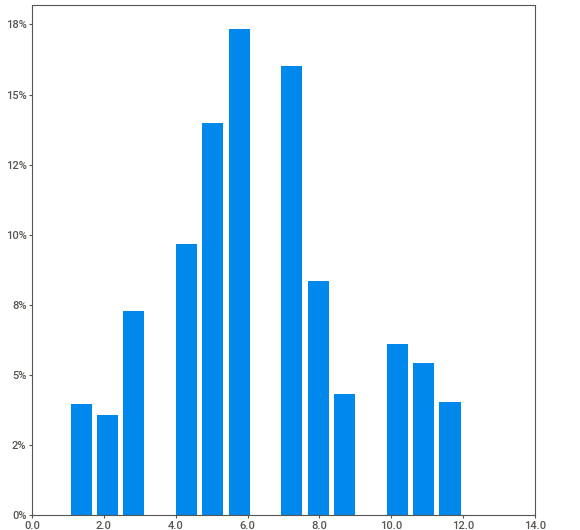
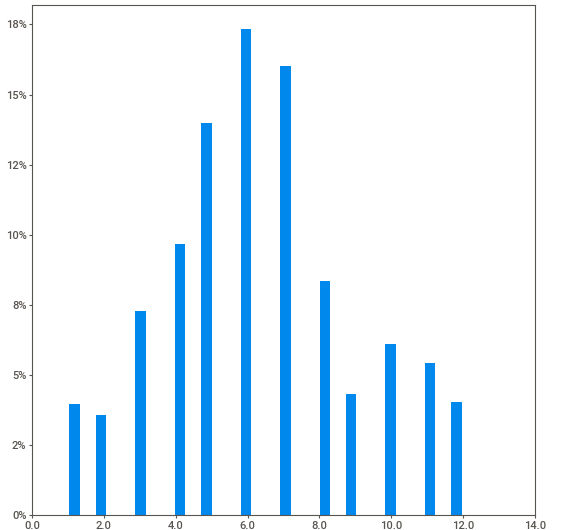
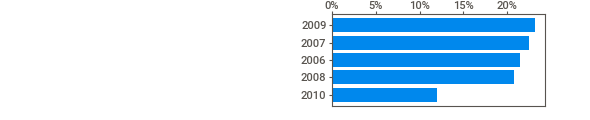
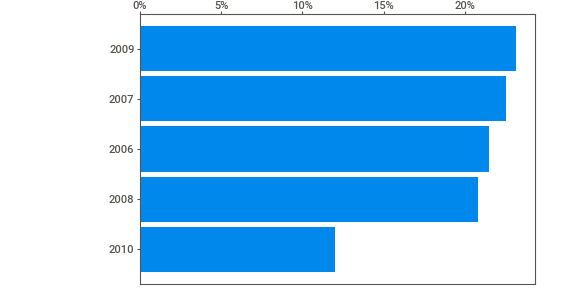
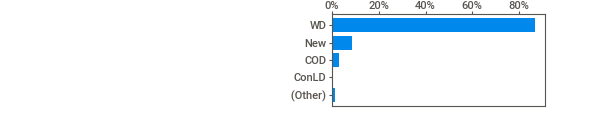
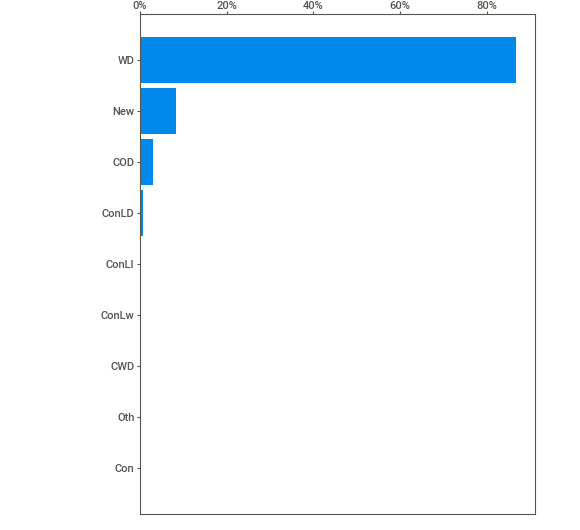
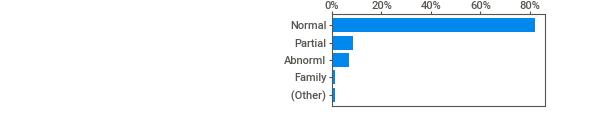
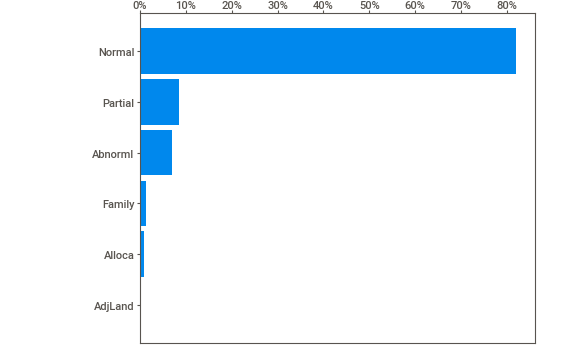
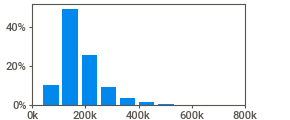
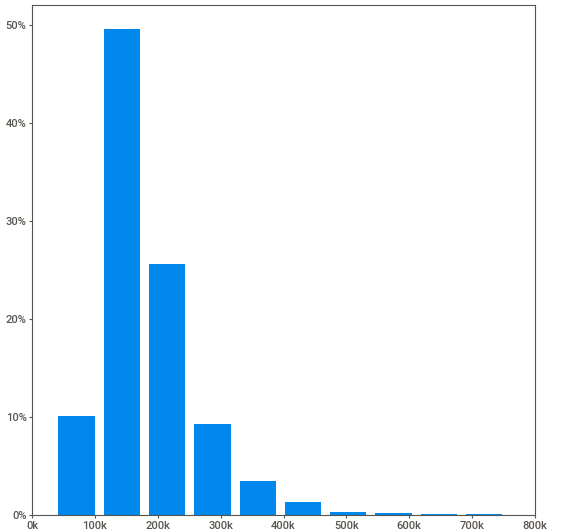
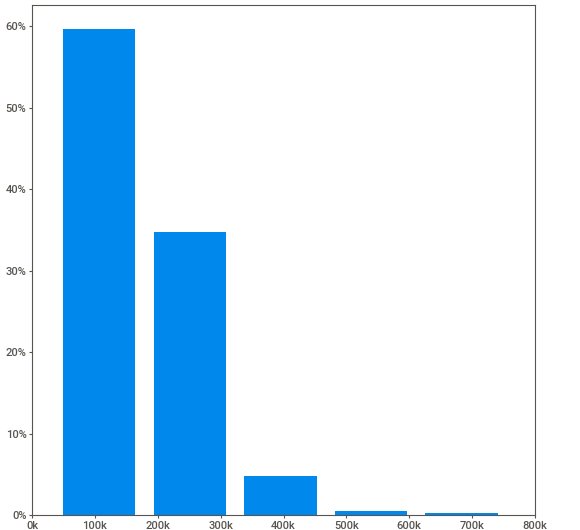
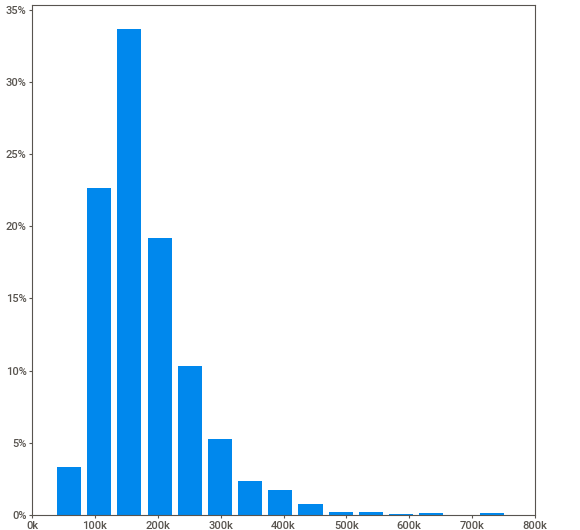
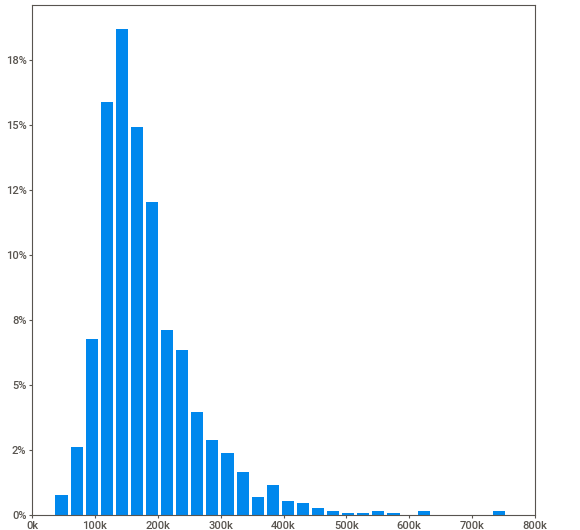
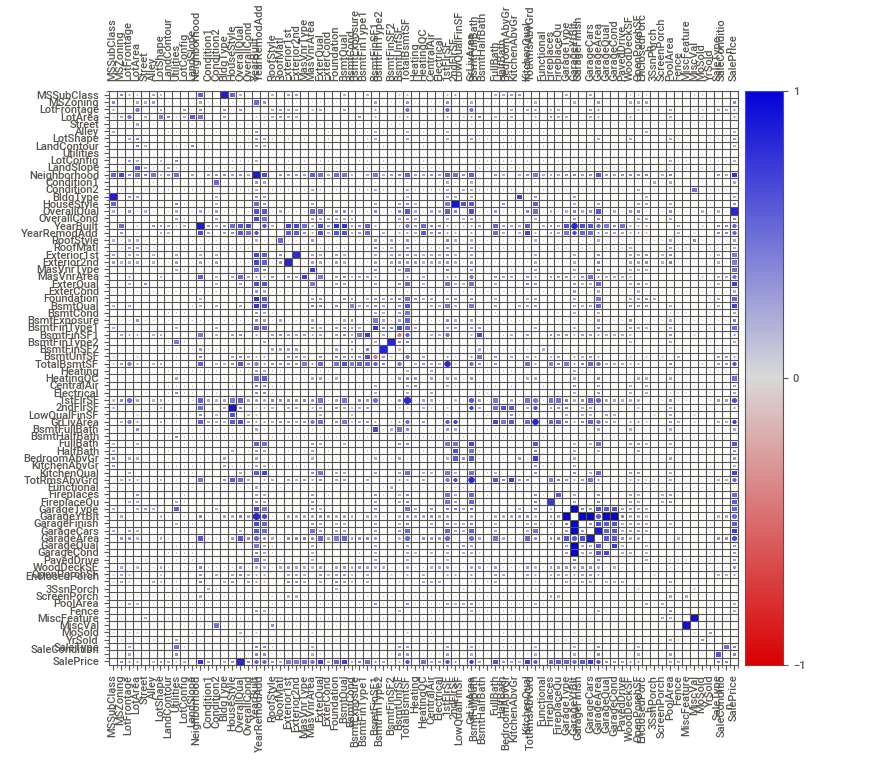
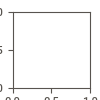

In [4]:
houseprices_report = sw.analyze(X)
houseprices_report.show_notebook(layout='vertical')

**Fast brief on the data fields**

1. **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
1. **MSSubClass**: The building class
1. **MSZoning**: The general zoning classification
1. **LotFrontage**: Linear feet of street connected to property
1. **LotArea**: Lot size in square feet
1. **Street**: Type of road access
1. **Alley**: Type of alley access
1. **LotShape**: General shape of property
1. **LandContou**r: Flatness of the property
1. **Utilities**: Type of utilities available
1. **LotConfig**: Lot configuration
1. **LandSlop**e: Slope of property
1. **Neighborhood**: Physical locations within Ames city limits
1. **Condition1**: Proximity to main road or railroad
1. **Condition2**: Proximity to main road or railroad (if a second is present)
1. **BldgType**: Type of dwelling
1. **HouseStyle**: Style of dwelling
1. **OverallQual**: Overall material and finish quality
1. **OverallCond**: Overall condition rating
1. **YearBuilt**: Original construction date
1. **YearRemodAdd**: Remodel date
1. **RoofStyle**: Type of roof
1. **RoofMatl**: Roof material
1. **Exterior1st**: Exterior covering on house
1. **Exterior2nd**: Exterior covering on house (if more than one material)
1. **MasVnrType**: Masonry veneer type
1. **MasVnrArea**: Masonry veneer area in square feet
1. **ExterQual**: Exterior material quality
1. **ExterCond**: Present condition of the material on the exterior
1. **Foundation**: Type of foundation
1. **BsmtQual**: Height of the basement
1. **BsmtCond**: General condition of the basement
1. **BsmtExposure**: Walkout or garden level basement walls
1. **BsmtFinType1**: Quality of basement finished area
1. **BsmtFinSF1**: Type 1 finished square feet
1. **BsmtFinType2**: Quality of second finished area (if present)
1. **BsmtFinSF2**: Type 2 finished square feet
1. **BsmtUnfSF**: Unfinished square feet of basement area
1. **TotalBsmtSF**: Total square feet of basement area
1. **Heating**: Type of heating
1. **HeatingQC**: Heating quality and condition
1. **CentralAir**: Central air conditioning
1. **Electrical**: Electrical system
1. **1stFlrSF**: First Floor square feet
1. **2ndFlrS**F: Second floor square feet
1. **LowQualFinSF**: Low quality finished square feet (all floors)
1. **GrLivArea**: Above grade (ground) living area square feet
1. **BsmtFullBath**: Basement full bathrooms
1. **BsmtHalfBath**: Basement half bathrooms
1. **FullBath**: Full bathrooms above grade
1. **HalfBath**: Half baths above grade
1. **Bedroom**: Number of bedrooms above basement level
1. **Kitchen**: Number of kitchens
1. **KitchenQual**: Kitchen quality
1. **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
1. **Functional**: Home functionality rating
1. **Fireplaces**: Number of fireplaces
1. **FireplaceQu**: Fireplace quality
1. **GarageType**: Garage location
1. **GarageYrBlt**: Year garage was built
1. **GarageFinish**: Interior finish of the garage
1. **GarageCars**: Size of garage in car capacity
1. **GarageArea**: Size of garage in square feet
1. **GarageQual**: Garage quality
1. **GarageCond**: Garage condition
1. **PavedDrive**: Paved driveway
1. **WoodDeckSF**: Wood deck area in square feet
1. **OpenPorchSF**: Open porch area in square feet
1. **EnclosedPorch**: Enclosed porch area in square feet
1. **3SsnPorch**: Three season porch area in square feet
1. **ScreenPorch**: Screen porch area in square feet
1. **PoolArea**: Pool area in square feet
1. **PoolQC**: Pool quality
1. **Fence**: Fence quality
1. **MiscFeature**: Miscellaneous feature not covered in other categories
1. **MiscVal**: Value of miscellaneous feature
1. **MoSold**: Month Sold
1. **YrSold**: Year Sold
1. **SaleType**: Type of sale
1. **SaleCondition**: Condition of sale

**Missing data in the train set**

In [5]:
# Missing values in train
X.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
X.describe().transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

**columns with mission values and ratio**

In [7]:
# Compute the percentage of missing values for each column and sort the result
missing_ratio = (X.isnull().sum() / X.shape[0] * 100).sort_values(ascending=False)

# Drop all columns which have no missing data and sort them
missing_ratio.drop(missing_ratio[missing_ratio == 0].index, inplace=True)

# Create a simple table for better visualization (and understanding)
missing_values = pd.DataFrame(missing_ratio, columns=['Missing Ratio'])

print(missing_values)

              Missing Ratio
PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
FireplaceQu       47.260274
LotFrontage       17.739726
GarageYrBlt        5.547945
GarageCond         5.547945
GarageType         5.547945
GarageFinish       5.547945
GarageQual         5.547945
BsmtExposure       2.602740
BsmtFinType2       2.602740
BsmtCond           2.534247
BsmtQual           2.534247
BsmtFinType1       2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493


**Lets check the distribution of the target field**

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
mu = 180921.20 and sigma = 79415.29


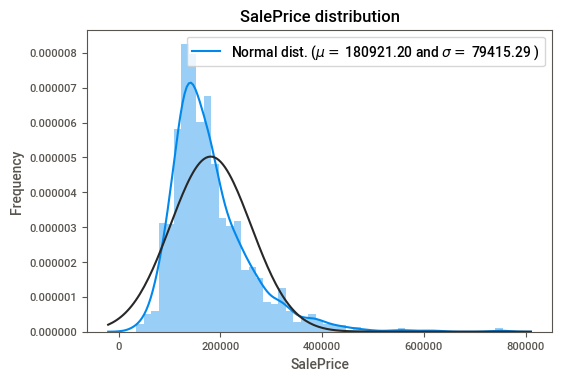

In [8]:
from scipy.stats import norm, skew #for some statistics

# Descriptive statistics summary
print(X['SalePrice'].describe())

# We'll need again to plot the distribution and the qqplot, so let's make a function
def plot_distribution_and_qqplot(data):
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)
    print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

    # Plot the distribution
    sns.distplot(data, fit=norm)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title(f'{data.name} distribution')
    plt.show()
    
plot_distribution_and_qqplot(X['SalePrice'])

# Clean the data

In [9]:
# We are gonna need this later for split back the fill df into train and test
n_train, n_test = X.shape[0], df_test.shape[0]

# Create one, whole dataframe
df_full = pd.concat((X, df_test), sort=False).reset_index(drop=True)

**2.1 Clean NULL values and convert String to numerical**

here we clean all field with over 1000 NULL values and convert string fields to numerical using dummies method

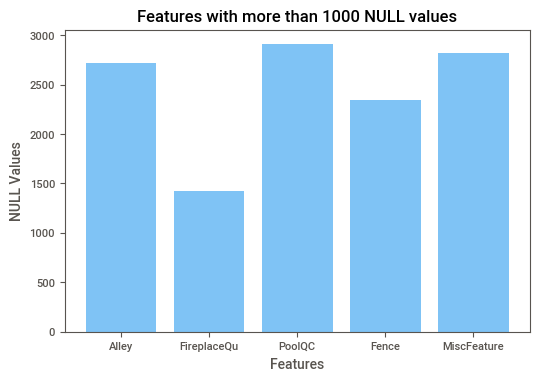

In [10]:
#Dealing with NULL values

features = []
nullValues = []

for i in df_full:
    if (df_full.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(df_full.isna().sum()[i])

df_full = df_full.dropna(axis=1, how='any', thresh = 1000) #Drop columns that contain more than 1000 NULL values
df_full.fillna(df_full.mean(), inplace=True) #Replace NULL values with mean values

df_full = pd.get_dummies(df_full) #Convert string values to integer values

y_pos = np.arange(len(features)) 
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL values')
plt.show()

assert df_full.isnull().values.any() == False, "Still contains NaN"

**2.2 Dealing with correlations**

In the first case, we will tend to drop features that are correlated to each other, since a high correlation between features indicates that the features bring up almost the same information, so it will be a waste of time and a waste of resources to consider such features.

In the second case, we will tend to drop features that are not correlated to the output, since a low correlation between a feature and the output indicates that such feature is not really associatied with output and doesn't contribute much to the final result.

In [11]:
#Drop features that are correlated to each other

covarianceMatrix = df_full.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
#I tried different values of threshold and 0.8 was the one that gave the best results

df_full = df_full.drop(setOfDroppedFeatures, axis=1)

In [12]:
#Drop features that are not correlated with output

nonCorrelatedWithOutput = [column for column in df_full if abs(df_full[column].corr(df_full["SalePrice"])) < 0.045]
#I tried different values of threshold and 0.045 was the one that gave the best results

df_full = df_full.drop(nonCorrelatedWithOutput, axis=1)

**2.3 Deal with outliers**

we will drop rows contaning values either too high or to low compared to the rest of the values

In [13]:
#First, we need to seperate the data (Because removing outliers ⇔ removing rows, and we don't want to remove rows from test set)

X = df_full.iloc[:1460]
df_test = df_full.iloc[1460:]

#Second, we will define a function that returns outlier values using percentile() method
    
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = X #We can't change train while running through it
tWithoutOutliers = t

for column in X:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(X[column])[0]) #outliers_iqr() returns an array
    trainWithoutOutliers = X.drop(outlierValuesList) #Drop outlier rows
    tWithoutOutliers = t.drop(outlierValuesList)
    
X = trainWithoutOutliers.reset_index(drop=True)
t = tWithoutOutliers.reset_index(drop=True)

**After the cleaning proccess we are left with 139 fields and 1335 rows**

In [14]:
X.info()
print("There are ", len(X.columns), "Parameters left")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Columns: 139 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(8), int64(17), uint8(114)
memory usage: 409.5 KB
There are  139 Parameters left


# Feature Selection #

We want to choose the best features for our use case.

We have learned 3 methods of Feature Selection:

1. Forward Feature Selection
1. Backward Feature Selection
1. Hybrid Feature Selection

In **Forward Feature Selection** we start from zero features and add features until we reach the number of maximum features or until we reach the best score.

In **Backward Feature Selection** we start from the full feature set and remove features until we reach the number of minimum features or until we reach the best score.

In **Hybrid Feature Selection**, we start from zero features and add/remove features until we reach the best score.

Lets use **RFECV** based on **backward feature selection** to find best number of features

In [15]:
# find best subset of features on this dataset

def find_best_subset(df, target):
    df = df.drop('SalePrice', axis=1)
    
    numerical_cols = df.select_dtypes(include=['uint8','int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    all_cols = categorical_cols.tolist() + numerical_cols.tolist()

    ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
    
    df_train_encoded = pd.DataFrame(ct_enc_std.fit_transform(df, target),columns=all_cols)
    
    selector = RFECV(
        SGDRegressor(random_state=42),
        cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
        ).fit(df_train_encoded, target)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.feature_names_in_) + 1)]
                             , y=selector.cv_results_['mean_test_score']))
    fig.update_xaxes(title_text="Number of features selected")
    fig.update_yaxes(title_text="Cross validation R2 score")
    fig.show()
    
    return df_train_encoded.loc[:, selector.support_].columns

cols_subset = find_best_subset(X, t)

**after using backward feature selection we learn that the highest subset's score is reached for 66 fields**

In [16]:
print("The selected fields:\n")
print(cols_subset)

The selected fields:

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch',
       'PoolArea', 'MSZoning_C (all)', 'MSZoning_RM', 'LotShape_IR2',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'BldgType_1Fam', 'BldgType_Twnhs',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'RoofMatl_WdShngl',
       'Exterior2nd_ImStucc', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_TA', 'Foundation_BrkTil',
       'BsmtQual_Ex', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_ALQ',
  

In [17]:
print("there are ",len(cols_subset), "left")
X = X[cols_subset]
df_test = df_test[cols_subset]
display(X.head())

there are  66 left


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  ...  GarageType_Attchd  \
0       196.0       706.0      150.0       856  ...                  1   
1         0.0       978.0      284.0      1262  ...                  1   
2       162.0       486.0      434.0       920  ...                  1   
3         0.0       216.0      540.0       961  ...                  0   
4       350.0       655.0      490.0      1145  ...                  1   

   GarageType_BuiltIn  GarageType_Detchd  GarageFinish_RFn  GarageQual_Fa  \
0                   0                  0                 1              0   
1                   0                  0                 1              0   
2                   0                  0                 1              0   
3                   0                  1                 0              0   
4                   0                  0                 1              0   

   GarageQual_TA  GarageCond_TA  SaleType_COD  SaleType_WD  \
0              1              1             0            1   
1              1              1             0            1   
2              1              1             0            1   
3              1              1             0            1   
4              1              1             0            1   

   SaleCondition_Normal  
0                     1  
1                     1  
2                     1  
3                     0  
4                     1  

[5 rows x 66 columns]

In [18]:
# check the shape of the dataset
print("Number of rows: {rows}, number of parameters: {para}".format(rows=X.shape[0], para = X.shape[1]))

# check the summary statistics of the numerical columns
X.describe().transpose()

Number of rows: 1335, number of parameters: 66


count          mean           std     min     25%  \
LotFrontage           1335.0     69.065090     20.872039    21.0    60.0   
LotArea               1335.0  10447.718352  10231.132206  1300.0  7500.0   
OverallQual           1335.0      5.962547      1.322203     1.0     5.0   
OverallCond           1335.0      5.626966      1.143468     1.0     5.0   
YearBuilt             1335.0   1968.090637     29.502827  1872.0  1950.0   
...                      ...           ...           ...     ...     ...   
GarageQual_TA         1335.0      0.890637      0.312211     0.0     1.0   
GarageCond_TA         1335.0      0.901124      0.298608     0.0     1.0   
SaleType_COD          1335.0      0.032210      0.176623     0.0     0.0   
SaleType_WD           1335.0      0.947566      0.222985     0.0     1.0   
SaleCondition_Normal  1335.0      0.897378      0.303578     0.0     1.0   

                              50%      75%       max  
LotFrontage             69.305795     78.0     313.0  
LotArea               9375.000000  11427.0  215245.0  
OverallQual              6.000000      7.0      10.0  
OverallCond              5.000000      6.0       9.0  
YearBuilt             1970.000000   1996.0    2009.0  
...                           ...      ...       ...  
GarageQual_TA            1.000000      1.0       1.0  
GarageCond_TA            1.000000      1.0       1.0  
SaleType_COD             0.000000      0.0       1.0  
SaleType_WD              1.000000      1.0       1.0  
SaleCondition_Normal     1.000000      1.0       1.0  

[66 rows x 8 columns]

# Lets look at the data after using feature selection

the next function plot relation of fields with the taget, lets seperate encoded and numerical fields and see what we got

**Plot Encoded Fields**

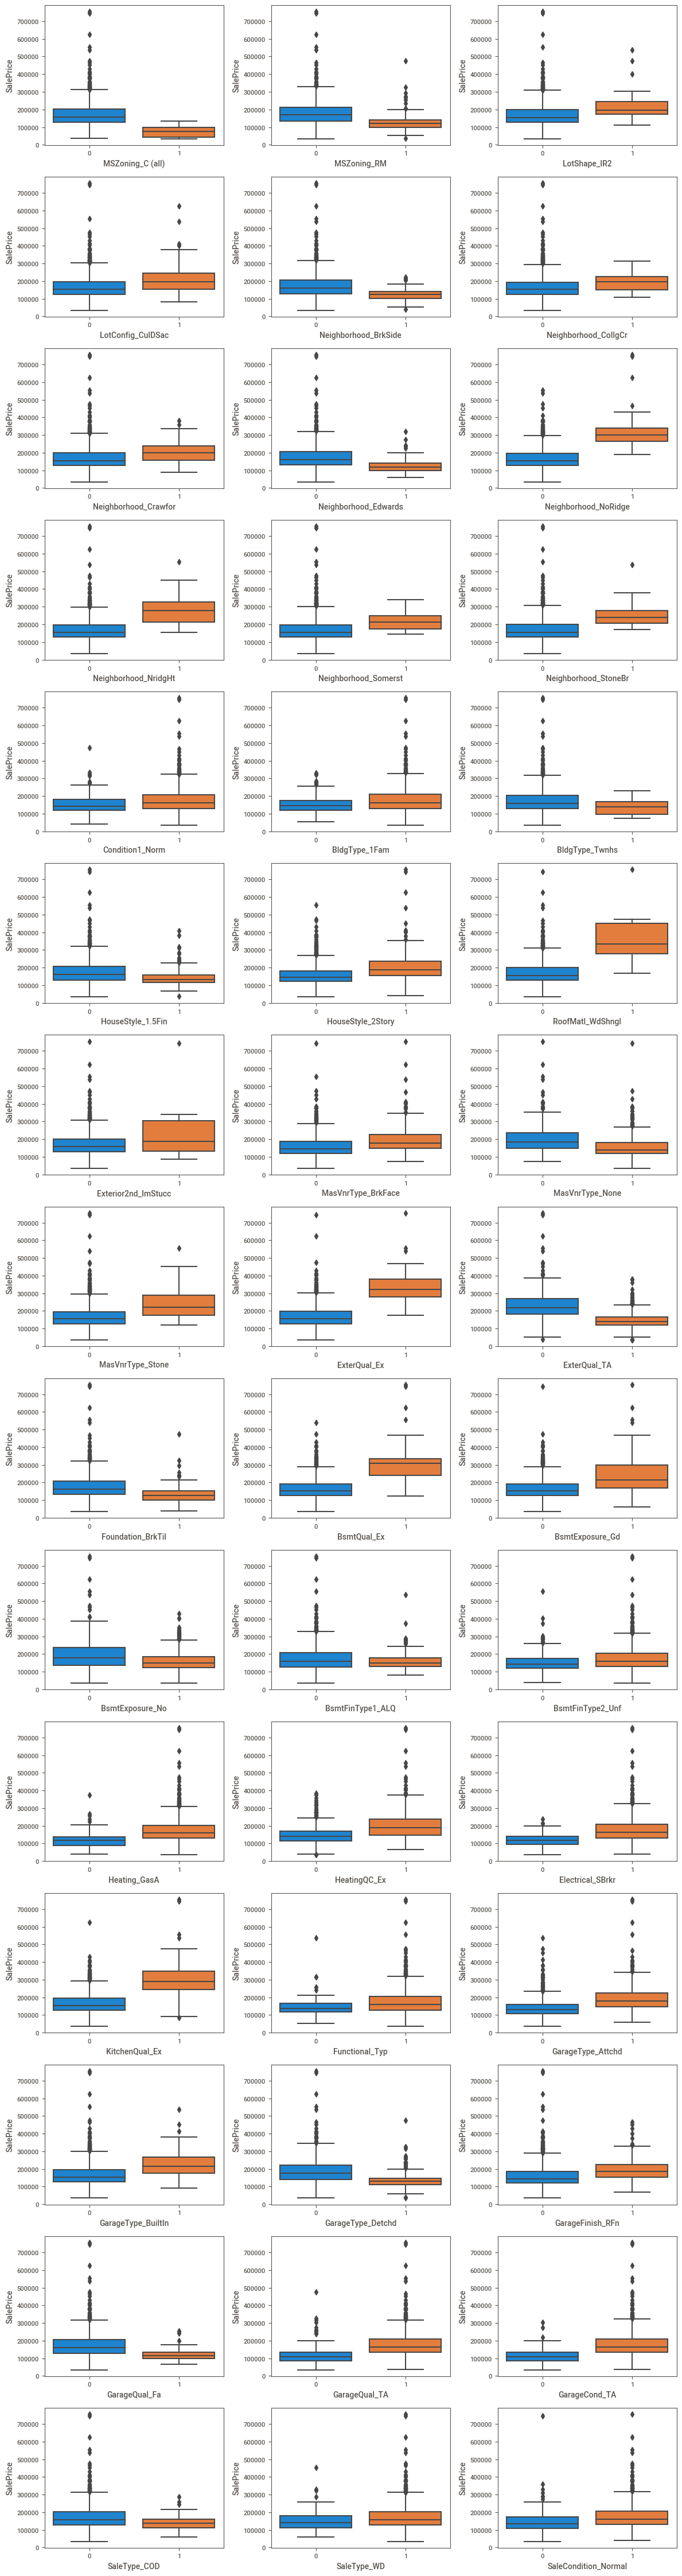

In [19]:
categorical_feats = X.select_dtypes(exclude='int64', include='uint8')
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=t, data=X, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

***Numerical Parameters***

In [20]:
# get color map
def get_sns_cmap(n, name='muted'):
    return sns.color_palette(palette=name, n_colors=n)

# plot with regression line target values by each feature
def plot_reg_target_values_by_each_feature(df, target ,target_column_name, include=None, exclude=None):
    ndf = df.copy()
    if (include is not None) and (exclude is not None):
        ndf = ndf.select_dtypes(exclude=exclude, include=include)
        
    ndf[target_column_name] = target
    nrows = math.ceil(math.sqrt(len(ndf.columns)-1))
    ncols = math.ceil((len(ndf.columns)-1)/nrows)
    fig, axes = plt.subplots(nrows - 1, ncols)
    plt.subplots_adjust(top=3.2, bottom=0, left=0, right=2.5)
    colors = get_sns_cmap(len(ndf.columns))

    counter = 0
    for i in range(nrows-1):
        for j in range(ncols):
            if i*nrows+j == len(ndf.columns): break
            ax = sns.regplot(x=ndf.columns[i*nrows+j], y=target_column_name, data=ndf, color=colors[i*nrows+j], ax=axes[i, j], scatter_kws={"s": 40})
            ax.set_title(label=f'{ndf.columns[i*nrows+j]} by {target_column_name}', fontsize=8)
   
    for i in range(len(df.columns)-1, nrows*ncols):
        fig.delaxes(axes.flatten()[i])


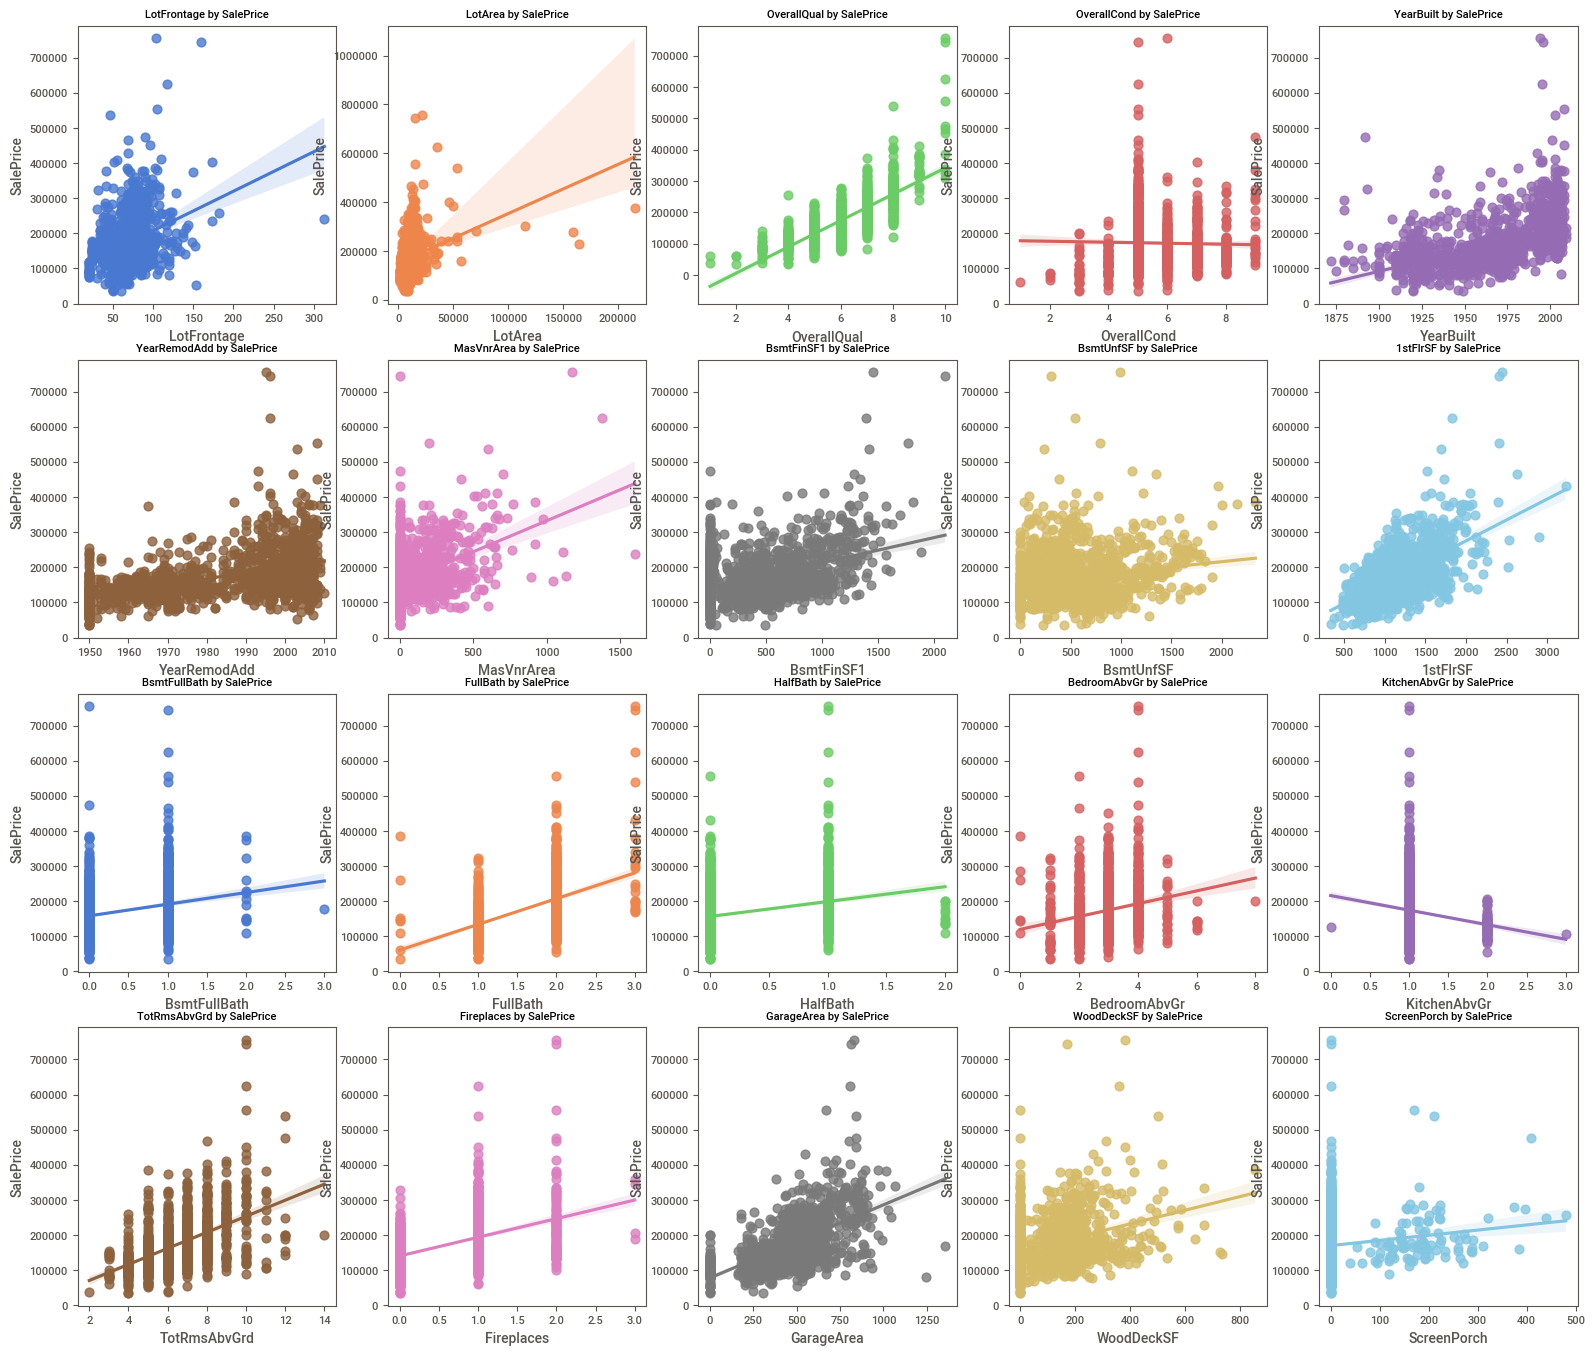

In [21]:
plot_reg_target_values_by_each_feature(X, t, 'SalePrice', ['int64','float64'], 'uint8')

# Regularization

**We have learned about three regularization techniques:**

1. L1 (also called Lasso).
1. L2 (also called Ridge).
1. Elastic Net (a combination of Lasso and Ridge).

Let's try the classification approach and use SGDClassifier.

In [22]:
# print lasso, ridge and elasticnet scores as regression 

sgd_lasso_reg = SGDRegressor(penalty='l1',
                             random_state=42)
sgd_ridge_reg = SGDRegressor(penalty='l2',
                             random_state=42)
sgd_elastic_reg = SGDRegressor(penalty='elasticnet',
                               random_state=42)

print("R2 score for regression:")
print('sgd_lasso',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_lasso_reg), 
              X, t, cv=15).mean())

print('sgd_ridge',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_ridge_reg), 
              X, t, cv=15).mean())

print('sgd_elastic',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_elastic_reg), 
              X, t, cv=15).mean())

R2 score for regression:
sgd_lasso 0.8912054915784751
sgd_ridge 0.8912077965365902
sgd_elastic 0.8912074513826054


**Hyper-Parameters Search**

Most of our models have a lot of parameters that can be adjusted.
Each parameter value can make our model better (or worse).
We want to be able to find the best hyperparameters for our models.
We have two approaches:

1. Grid Search
1. Random Search

**Lets use Grid Search to get best hyper-parameters**

In [23]:
# train with grid search and get best parameters

X_normalized = StandardScaler().fit_transform(X)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'),
                    'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(
    SGDRegressor(random_state=42),
     hyper_parameters).fit(X_normalized, t)

print('Accuracy score for regresssion:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for regresssion:
gs_model 0.8925410864787174
best params {'alpha': 0.01, 'penalty': 'l2'}


# Cross Validation

We can use CV (Cross-Validation) instead of breaking the data to train-validation splits.
When we use CV, we have better predictions of the test results.
It is similar to splitting the data, but we make sure that our split won't affect our result (we try a few possible splits).
We can use 2 CV:

1. **KFold**
1. **LPO** (Leave P out)

We will use **KFold** when we want speed.

We will use **LPO** when we want to be more precise and better predict the test score

In [24]:
# find generator length
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [25]:
# calculate score and loss from cv (k or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models',
                    total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids] 
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]
        
        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

**We will use Kfold CV to with the selected hyper-parameters to check the model accuracy**

**First, lets try with SGDRegressor**

In [26]:
numerical_cols = X.select_dtypes(include=['uint8','int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
ct = ColumnTransformer([
        ("encoding", OrdinalEncoder(), categorical_cols),
        ("standard", StandardScaler(), numerical_cols)])

model_pipe = make_pipeline(ct, SGDRegressor(penalty='l2',alpha=0.01, random_state=42))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=None,
                       k=10, show_score_loss_graphs=True)

print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

mean cv val score: 0.89
mean cv val loss 573508487.33
mean cv train score: 0.91
mean cv train loss 435858437.15


**Now, lets try LinearRegression**

In [27]:
model_pipe = make_pipeline(ct, LinearRegression())
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=None,
                       k=10, show_score_loss_graphs=True)

print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

mean cv val score: 0.89
mean cv val loss 563841751.36
mean cv train score: 0.92
mean cv train loss 425833537.36


# Submission

**we can clearly see that the best method is LinearRegression, we will use that to train a model to predict the test SalePrices**

In [28]:
Y = np.log1p(t)
model = make_pipeline(ct, LinearRegression()).fit(X, Y)

In [29]:
predictions = np.expm1(model.predict(df_test))

# Save predictions to file
submission = pd.DataFrame({'Id': test_ID,
                       'SalePrice': predictions})

submission.to_csv('submission.csv', index=False)

![](https://i.ibb.co/YfM5kK5/Screenshot-2023-01-01-235029.png)

![](https://i.ibb.co/BrWBk6t/Screenshot-2023-01-01-235104.png)

# Summary

In conclusion, I discovered that its important to clean irrelevent data in a big database such has this, including getting rid off outliers.
Using the power of selection features can really facilitate and improve the accuracy of the model.
Playing with the regulation hyper-paramters, by using grid I was able to find the best ones.
Using a cross validation instead of Train_Test_Split give more precise results the predict how well our model will fit the test.
Finally, altough LinearRegression and SGDRegressor got high results, LR was the best option for fitting our model.

# References

[**House Prices: complete solution**
](https://www.kaggle.com/code/mromanelli9/house-prices-complete-solution)

**Moodle Notebooks 6-7**

[**House Prices Complete Solution with Guidance**](https://www.kaggle.com/code/marweni/house-prices-complete-solution-with-guidance)
